In [82]:
#install.packages("ggplot2")
#install.packages("ggsignif")

# Load required libraries
library(ggplot2)
library(ggsignif)

# Define the data

mcc_pna <- c(0.7394696012154377, 0.6922647231430668, 0.8435093281406469, 0.6842220865009516, 0.7695359800907401, 0.7828277528962814, 0.796018215806199, 0.7291145403765121, 0.7401882437696564, 0.8160707363516055, 0.7633160219774909, 0.7843018447865899, 0.7219008043444444, 0.7927382823059608)
auprs_pna <- c(0.8703067171484828, 0.859280532564159, 0.9445234790159874, 0.8610580736107556, 0.8899932672019482, 0.8980541795001162, 0.9362336668512574, 0.8703165886980168, 0.8541242812599744, 0.9163485267353879, 0.8920940249833498, 0.9221723517895575, 0.8096481146247356, 0.8967774356061995)
mcc_gcn <- c(0.6334688851078916, 0.7379939247036733, 0.8663793555066783, 0.756257984014575, 0.7648392127425765, 0.8360348386271041, 0.7230357080485874, 0.7471960180499347, 0.7535247576774583, 0.7138860285340082, 0.7933581647735962, 0.7544388615752047, 0.8016185445188615, 0.7175452927034753)
auprs_gcn <- c(0.8316543993449244, 0.8573094768033259, 0.9662102913492296, 0.8969410264803791, 0.8931756631393369, 0.9216899764362637, 0.8733822859676268, 0.8804700528553464, 0.9086830237395496, 0.8277936826852546, 0.9241663224378083, 0.8641334985286196, 0.9097696555589441, 0.8695394414241517)
mcc_mlp <- c(0.6812436160839133, 0.762169593420683, 0.7721183149793104, 0.7416738003891814, 0.737329780075531, 0.7437566679096157, 0.6525189552677927, 0.7194509550797235, 0.64398009339612, 0.6687872599472221, 0.7549681435012354, 0.7296909587556629, 0.6547294421732139, 0.6931212534030715)
auprs_mlp <- c(0.8041872173232203, 0.9089249830506482, 0.8824207416363313, 0.8335954615402026, 0.8790614766047987, 0.8808328356300535, 0.809992003676858, 0.8827113008063637, 0.8235603884265352, 0.7912181123073649, 0.8805455158646008, 0.8602595369130658, 0.8110738389653035, 0.8416323716862826)
mcc_mlp_no_pe <- c(0.6741496940340735, 0.6261576346482716, 0.6845717480908935, 0.6578096420196421, 0.6237295030814192, 0.633326967673143, 0.6991309111412977, 0.7133112094259628, 0.6229364381166789, 0.6435393706802034, 0.6421001770558433, 0.6252363167958181, 0.461078428408224, 0.545111737611799, 0.6795490912924744, 0.639570108434793)
auprs_mlp_no_pe <- c(0.7981795028401129, 0.7718848622351263, 0.7849027513029954, 0.7309485143850598, 0.7842997888918088, 0.7769651757992697, 0.7935486275941157, 0.8273523555542276, 0.7801328774532041, 0.7112890597681094, 0.7782112208103218, 0.7953756168997099, 0.6922334941949988, 0.6558021876566684, 0.7849555642389872, 0.8060206199569034)

pdf("ablations_models.pdf", width = 25, height = 18)
# Function to create data frames
create_model_data <- function(run_name, mcc_values, aupr_values) {
  data.frame(
    Run = rep(run_name, length(mcc_values) + length(aupr_values)),
    Metric = c(rep("MCC", length(mcc_values)), rep("AUPR", length(aupr_values))),
    Value = c(mcc_values, aupr_values)
  )
}

# Combine the data
data <- rbind(
  create_model_data("PNA", mcc_pna, auprs_pna),
  create_model_data("GCN", mcc_gcn, auprs_gcn),
  create_model_data("MLP", mcc_mlp, auprs_mlp),
  create_model_data("MLP no PE", mcc_mlp_no_pe, auprs_mlp_no_pe)
)

# Set the order of the models
data$Run <- factor(data$Run, levels = c("MLP", "GCN", "PNA", "MLP no PE"))

# Separate data by metric
data_MCC <- subset(data, Metric == "MCC")
data_AUPR <- subset(data, Metric == "AUPR")

# Perform t-tests and store p-values
# MCC
t_MCC_MLP_vs_GCN <- t.test(Value ~ Run, data = subset(data_MCC, Run %in% c("MLP", "GCN")))
p_MCC_MLP_vs_GCN <- t_MCC_MLP_vs_GCN$p.value

t_MCC_MLP_vs_PNA <- t.test(Value ~ Run, data = subset(data_MCC, Run %in% c("MLP", "PNA")))
p_MCC_MLP_vs_PNA <- t_MCC_MLP_vs_PNA$p.value

t_MCC_MLP_no_pe_vs_PNA <- t.test(Value ~ Run, data = subset(data_MCC, Run %in% c("MLP no PE", "PNA")))
p_MCC_MLP_no_pe_vs_PNA <- t_MCC_MLP_no_pe_vs_PNA$p.value

# AUPR
t_AUPR_MLP_vs_GCN <- t.test(Value ~ Run, data = subset(data_AUPR, Run %in% c("MLP", "GCN")))
p_AUPR_MLP_vs_GCN <- t_AUPR_MLP_vs_GCN$p.value

t_AUPR_MLP_vs_PNA <- t.test(Value ~ Run, data = subset(data_AUPR, Run %in% c("MLP", "PNA")))
p_AUPR_MLP_vs_PNA <- t_AUPR_MLP_vs_PNA$p.value

t_AUPR_MLP_no_pe_vs_PNA <- t.test(Value ~ Run, data = subset(data_AUPR, Run %in% c("MLP no PE", "PNA")))
p_AUPR_MLP_no_pe_vs_PNA <- t_AUPR_MLP_no_pe_vs_PNA$p.value

# Map p-values to significance levels
get_significance <- function(p_value) {
  if (p_value < 0.001) {
    return("***")
  } else if (p_value < 0.01) {
    return("**")
  } else if (p_value < 0.05) {
    return("*")
  } else {
    return("ns")
  }
}

# Prepare comparisons and annotations for significant p-values only
# For MCC
comparisons_MCC <- list()
annotations_MCC <- c()

pvals_MCC <- c(p_MCC_MLP_vs_GCN, p_MCC_MLP_vs_PNA, p_MCC_MLP_no_pe_vs_PNA)
comp_MCC <- list(c("MLP", "GCN"), c("MLP", "PNA"), c("MLP no PE", "PNA"))
signif_MCC <- sapply(pvals_MCC, get_significance)

for (i in seq_along(pvals_MCC)) {
  if (signif_MCC[i] != "ns") {
    comparisons_MCC <- append(comparisons_MCC, list(comp_MCC[[i]]))
    annotations_MCC <- c(annotations_MCC, signif_MCC[i])
  }
}

# For AUPR
comparisons_AUPR <- list()
annotations_AUPR <- c()

pvals_AUPR <- c(p_AUPR_MLP_vs_GCN, p_AUPR_MLP_vs_PNA, p_AUPR_MLP_no_pe_vs_PNA)
comp_AUPR <- list(c("MLP", "GCN"), c("MLP", "PNA"), c("MLP no PE", "PNA"))
signif_AUPR <- sapply(pvals_AUPR, get_significance)

for (i in seq_along(pvals_AUPR)) {
  if (signif_AUPR[i] != "ns") {
    comparisons_AUPR <- append(comparisons_AUPR, list(comp_AUPR[[i]]))
    annotations_AUPR <- c(annotations_AUPR, signif_AUPR[i])
  }
}

# Create the MCC plot with violin plot
p_MCC <- ggplot(data_MCC, aes(x = Run, y = Value, fill = "MCC")) +
  geom_violin(trim = FALSE, alpha = 0.5) +   # Add violin plot
  geom_boxplot(outlier.shape = NA, width = 0.3, alpha = 0.7) +  # Add boxplot on top
  geom_jitter(position = position_jitter(width = 0.2), alpha = 0.7, size = 3, color = "darkgrey") +
  labs(title = "MCC") +
  theme_minimal(base_size = 32) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'none',
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("MCC" = "#DA3A2A")) +
  scale_y_continuous(limits = c(0.55, 0.95)) # Adjust limits for MCC

# Add significance annotations for MCC
if (length(comparisons_MCC) > 0) {
  p_MCC <- p_MCC + geom_signif(
    comparisons = comparisons_MCC,
    annotations = annotations_MCC,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.05
  )
}

# Create the AUPR plot with violin plot
p_AUPR <- ggplot(data_AUPR, aes(x = Run, y = Value, fill = "AUPR")) +
  geom_violin(trim = FALSE, alpha = 0.5) +   # Add violin plot
  geom_boxplot(outlier.shape = NA, width = 0.3, alpha = 0.7) +  # Add boxplot on top
  geom_jitter(position = position_jitter(width = 0.2), alpha = 0.7, size = 3, color = "darkgrey") +
  labs(title = "AUPR") +
  theme_minimal(base_size = 32) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'none',
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("AUPR" = "#6BA8EC")) +
  scale_y_continuous(limits = c(0.7, 1.03)) # Adjust limits for AUPR

# Add significance annotations for AUPR
if (length(comparisons_AUPR) > 0) {
  p_AUPR <- p_AUPR + geom_signif(
    comparisons = comparisons_AUPR,
    annotations = annotations_AUPR,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.05
  )
}

# Arrange the two plots vertically
grid.arrange(p_MCC, p_AUPR, ncol = 2)

# Close the device to save the file
dev.off()


Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 32 rows containing missing values or values outside the scale range
(`geom_violin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2

Warning message:
“Removed 26 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”


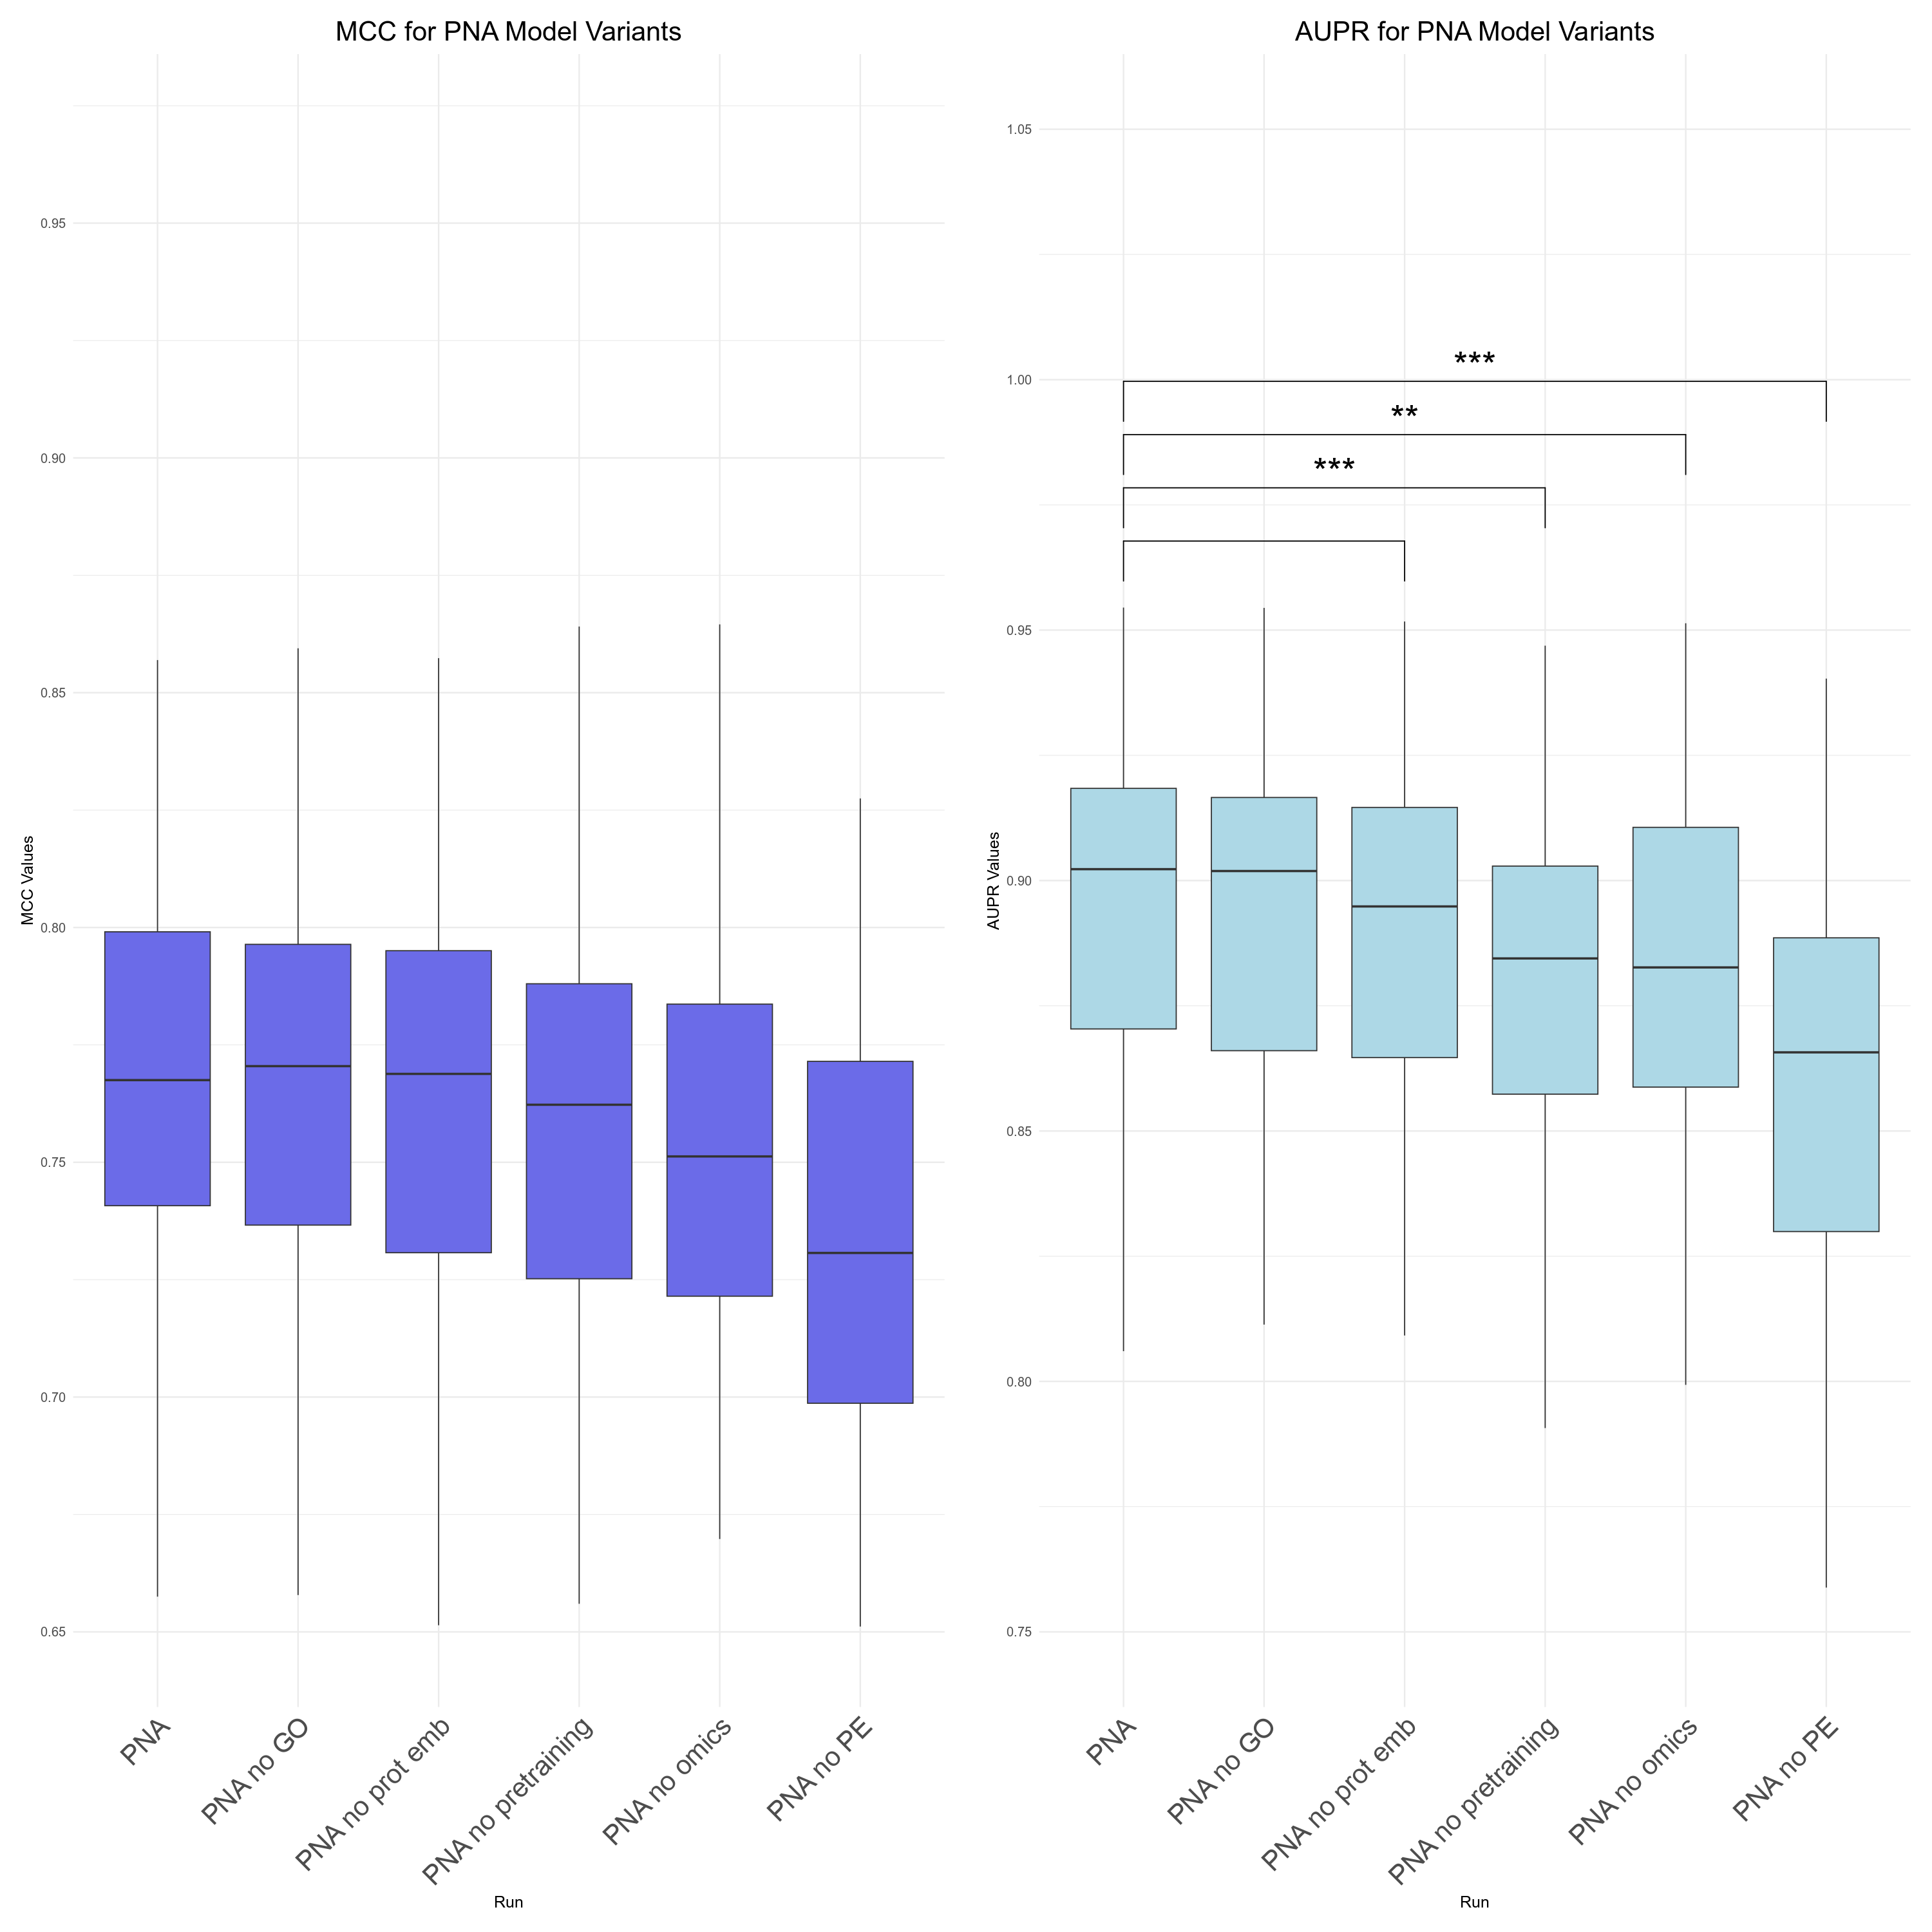

In [76]:
#install.packages("gridExtra")

# Load required libraries
library(ggplot2)
library(ggsignif)
library(gridExtra) 

# Increase plot size (for Jupyter Notebook or RStudio)
options(repr.plot.width = 25, repr.plot.height = 25)  # Adjust these values as needed

# Define the data
# PNA
mcc_pna <- c(0.7181004878843954, 0.8429700517923994, 0.8137657119295627, 0.762038753568562, 0.7508482212262046, 0.7730022614969037, 0.7510372704809194, 0.8096782512610069, 0.7981820774459073, 0.7766952112958743, 0.7812519128323714, 0.7821271197641695, 0.810294429799244, 0.8203307201677477, 0.8483230592396074, 0.8087489637356772, 0.7473188881063237, 0.7234346161959235, 0.7606041733442825, 0.7571978949491003, 0.8237430036493796, 0.673035268984576, 0.8243726521482515, 0.833123932744629, 0.762698754266131, 0.7917793119226619, 0.8095243471986416, 0.6990535106065685, 0.6574964901484789, 0.744495467618778, 0.7929292309816696, 0.8062802855169323, 0.7694551328888741, 0.783902333372609, 0.6998608273114458, 0.7870274429976977, 0.7341448099135911, 0.707050706825193, 0.7604511400787753, 0.761975580101687, 0.8236431548906861, 0.7837422971892922, 0.7044267947127248, 0.804301941911767, 0.8091699812522103, 0.7319350773264175, 0.7564115214427777, 0.7718429173168688, 0.8103172227010713, 0.7074413310597623, 0.8124680787433224, 0.7348670606712034, 0.8498741581209304, 0.780212310312959, 0.6337273709821296, 0.7636544536948595, 0.7543524802016661, 0.7619013861272032, 0.727318458037019, 0.8219917487235238, 0.742152286031801, 0.7949802604155247, 0.7987109608840797, 0.6675612186002978, 0.7693849650721136, 0.748990844647562, 0.7496469848034775, 0.7413313771269825, 0.7109042561400234, 0.7864886855630673, 0.7866766443376513, 0.7548041565364031, 0.7390211269125345, 0.7854066413551835, 0.7640178624676331, 0.7922338135870066, 0.6754103703865268, 0.7064197193394173, 0.8091387594758148, 0.7114839538376797, 0.8133415186600297, 0.7659848975751805, 0.6732647506128433, 0.7710427740284131, 0.7517669683786814, 0.8569517211675542, 0.8099763905223842, 0.8129469095175127, 0.7690080752808676, 0.6991023831763099, 0.7375476486499407, 0.7613146640644952, 0.6732074124505999, 0.7351028580634774, 0.7594376908601814, 0.7921682249841311, 0.7368493329222906, 0.7848051980311993, 0.8001970144258168, 0.7482940059179807, 0.789159524093515)
auprs_pna <- c(0.8525975058608385, 0.9405742783337526, 0.9337495686378142, 0.9055481020260066, 0.8452116529299231, 0.9075916705436307, 0.8346768215807586, 0.9149639431945282, 0.9066398779672434, 0.9079152615162865, 0.9124187939658146, 0.9132396086650184, 0.9189971338405281, 0.9184031515600607, 0.9409751101513386, 0.9256280898455262, 0.9015703808837013, 0.8617057391541587, 0.9060357577453815, 0.8820126640068613, 0.9065575441803283, 0.8382641589198159, 0.9176081870929667, 0.9370006519731966, 0.8926292625146501, 0.9094926994213163, 0.9033152473689656, 0.8692678508447245, 0.8308599640985188, 0.8395861781526432, 0.9103387458328498, 0.9404234489302297, 0.890693518541565, 0.9061611319475181, 0.8613039727206699, 0.9223366785409816, 0.8741865009594246, 0.8703728766361547, 0.8915568783495619, 0.8857263000127338, 0.9298772990926298, 0.9240908311641594, 0.8430043563823022, 0.9287252556646994, 0.9329279242660009, 0.9043906435397556, 0.8879227323429445, 0.8882578382085071, 0.9260911285842836, 0.866898060571549, 0.8810570346697582, 0.8706915214504489, 0.9544909987885261, 0.9008431722906195, 0.806042286691538, 0.8996088782713265, 0.8947060777074782, 0.9005935495567373, 0.8592285399703125, 0.9412021491620403, 0.8781568471895735, 0.9206254540000979, 0.8972319177102861, 0.8538459123041987, 0.9209572780224177, 0.8791015087251246, 0.9007541297432363, 0.8692054124718686, 0.8616672527358954, 0.9117386665203817, 0.9005839189900442, 0.9056331716484909, 0.88495874279502, 0.9106965880174634, 0.9141974254778622, 0.9169512618964083, 0.8571038963593416, 0.8561755545567946, 0.9293042412526834, 0.8399712769248625, 0.9212359148071292, 0.907967637107417, 0.8436967365001742, 0.915437584372689, 0.8665063449789254, 0.9266536592574719, 0.9152202539000154, 0.9318629008542703, 0.9260020372196445, 0.8486869685290023, 0.8901016733957847, 0.9022701179566834, 0.8240750826850061, 0.8539053864750249, 0.8951709260778905, 0.9271979755818822, 0.8702857310216959, 0.9074381855595469, 0.942286623916087, 0.8762881164538531, 0.9202706750147623)

# PNA without GO annotations
mcc_pna_no_go <- c(0.7061965207455639, 0.8469519142120001, 0.8021970327372505, 0.784807170021695, 0.7747740454238302, 0.7689380464794694, 0.7316115708319364, 0.8063270501552398, 0.7884600636641481, 0.7754568088283507, 0.795706854838306, 0.772631757451609, 0.824420315102232, 0.816696454517141, 0.8240866013518311, 0.8179080365594069, 0.7596554098015414, 0.733038905328187, 0.7662323667693995, 0.7386911955989215, 0.816543493018054, 0.6903368608087503, 0.7954740718703428, 0.8270557583327808, 0.7727473504555895, 0.7620924055165293, 0.8133959521662908, 0.7430654779703606, 0.6713986976348518, 0.7333203873128443, 0.7832014681811843, 0.8215150143220977, 0.761598726831628, 0.7966467221899619, 0.7030428352421421, 0.7659844838662186, 0.7224573185960981, 0.7222881789135399, 0.7651579742197638, 0.7385472131511863, 0.8437719678050442, 0.8209403361719312, 0.7231811435752244, 0.8136486709795616, 0.7915234439849911, 0.7388038143525264, 0.7468192805298551, 0.7561309038320883, 0.8150633113064748, 0.7250622557397955, 0.8142370955367163, 0.6927691160987682, 0.8594620123791167, 0.7326889780785797, 0.6389881269969875, 0.7695190546572268, 0.7814900656347132, 0.7900773557893608, 0.7307871344549154, 0.824571961415106, 0.7104816397318925, 0.7833170868872174, 0.7431038767459806, 0.640639567280257, 0.7949897525096711, 0.7362610399443283, 0.7683479022164954, 0.7253754267531386, 0.752433959621707, 0.7805364800048408, 0.7566393983411167, 0.7844233265018336, 0.7432643195192329, 0.756160977681059, 0.7728906296908022, 0.8005876839456528, 0.6578370319280001, 0.6436718386939153, 0.8012356765310962, 0.694854478266231, 0.8055246628621534, 0.7589285998675719, 0.6796767870820875, 0.7833861029243784, 0.7213667459773143, 0.8328578488593577, 0.8064487348393559, 0.8360164424505712, 0.7858045199844378, 0.7201792665704597, 0.7390182335498616, 0.7381344924669284, 0.6982078253950031, 0.7377004086008639, 0.7841765536233032, 0.7936682929385179, 0.7250729273018326, 0.7929596351247832, 0.7714291817021857, 0.7273185993543764, 0.7769555338610631)
auprs_pna_no_go <- c(0.8528024714134383, 0.9512017361467938, 0.9390369539310687, 0.9041178327046481, 0.8549757758938732, 0.9004102131067168, 0.8306147257603665, 0.9103422751371619, 0.9073088303204198, 0.8977719582060913, 0.9199439137347772, 0.9141812654067575, 0.9192427530346501, 0.9133840947443949, 0.9215699007713241, 0.9356074255358152, 0.900000455082723, 0.8648054231235559, 0.9094578034678975, 0.8799222238002796, 0.9139348908059318, 0.8439530631446898, 0.9160287327982217, 0.931641187175936, 0.8993145654337621, 0.8997753127950748, 0.9119728813922199, 0.873714563186355, 0.8500418626227774, 0.8420888164402344, 0.9087061077959548, 0.9320642206015821, 0.8832909066258227, 0.8899948888499372, 0.8659249164679732, 0.9087401591678329, 0.8568168897366748, 0.8603932757667231, 0.898739765491003, 0.8824412876432556, 0.937356267788392, 0.9379059789846439, 0.8492727949279736, 0.9319899589234273, 0.9335135592364681, 0.9045875520795136, 0.8879983582118021, 0.8849544308632062, 0.9291046057778283, 0.8574437629029295, 0.8827961968518876, 0.8571869245438611, 0.9544359860972108, 0.883283261945407, 0.8113473399550475, 0.901897616394081, 0.9051614850680091, 0.9106260312043052, 0.8524340712024834, 0.9455862780375657, 0.8693075864839035, 0.911057066630562, 0.8956298674785454, 0.840302687521711, 0.9196499619101347, 0.8698553272073871, 0.9054685818743969, 0.8607779107112636, 0.8660305587147142, 0.9100508587584033, 0.8905468308555052, 0.9117699618301071, 0.8818980791047984, 0.9064524310753725, 0.922594239993205, 0.9079053444257512, 0.8519066220101866, 0.8382369122084313, 0.9264489272451701, 0.8482571729998402, 0.9241202620280953, 0.9027812055718373, 0.845716074840009, 0.9227337080214528, 0.8660289268333742, 0.922984115271919, 0.9151604987194414, 0.9431546786885395, 0.9216192337828785, 0.8427713045398662, 0.8867403654776622, 0.895656578918317, 0.8416087383600332, 0.8445293209518313, 0.9021242276960854, 0.9350480584732661, 0.8758548315823844, 0.9132392421569335, 0.9165799916763234, 0.8680759241789936, 0.9169761390828246)

# PNA without protein embeddings
mcc_pna_no_prot_emb <- c(0.6514084861563251, 0.8238610103676954, 0.8095923556085758, 0.7537429620261371, 0.7469036227502452, 0.7863942582232231, 0.7218927441484106, 0.788491304643327, 0.8105407141077612, 0.7719442212840077, 0.805500914391512, 0.805824744926231, 0.8082616803095867, 0.8175378899319267, 0.8573653484009792, 0.7805842758277091, 0.7164421533691426, 0.7282940112754417, 0.7709246065490015, 0.7527723909020788, 0.7774964454918468, 0.6563225854054294, 0.7905978924282918, 0.8261853490583441, 0.7487759954368907, 0.7556871396221008, 0.8143083299842597, 0.7437579494581864, 0.630169727444898, 0.6854499747509212, 0.7951661175228336, 0.8012323450297008, 0.7795892472657922, 0.7827641587172685, 0.7190953536224292, 0.7732392038123866, 0.6887143938456801, 0.7535085931422807, 0.7345163739053383, 0.7620704453453389, 0.8118591019681933, 0.8058887753197158, 0.703782783152181, 0.8073202725700156, 0.7898789029155366, 0.7767246258903765, 0.7371979463200459, 0.7779421635622968, 0.7913064083204293, 0.691838171007281, 0.8033894574407595, 0.723143403031469, 0.8283786510138352, 0.7505038592534603, 0.671019032971428, 0.7795823438398474, 0.7689665948965138, 0.7686805723568263, 0.7167360574878681, 0.8394389565407565, 0.7367892863919556, 0.8195744796929889, 0.7766605544876353, 0.6732527820970293, 0.7901355092563356, 0.7565328449150017, 0.7482212420034413, 0.7046743028979255, 0.7025683537461751, 0.7693500299442328, 0.7315543900066407, 0.7572184911453868, 0.7215837274061109, 0.8103705997403037, 0.7528523119887872, 0.7796382208216197, 0.6854374230341796, 0.707797466920418, 0.8343036725958738, 0.6691723818930148, 0.7624808994125336, 0.7803354410039388, 0.7007701098686362, 0.7714037655941499, 0.7096876903340317, 0.8569517211675542, 0.8209998058000322, 0.8114415845859124, 0.8006966994395379, 0.7343663126076299, 0.7325267091093932, 0.7420065426259773, 0.6704093043809989, 0.7635578595598165, 0.7247769540786075, 0.7694622117459176, 0.7335994322527092, 0.7749191233605428, 0.7950205130630105, 0.6938607194466784, 0.7533978946070456)
auprs_pna_no_prot_emb <- c(0.8183145425500914, 0.9252655355856296, 0.937362576005509, 0.8867457999581017, 0.8146232135730284, 0.9154943071070816, 0.8177573502920656, 0.9176729000884919, 0.901560282159893, 0.9112479643787396, 0.9150014566881485, 0.90684127876053, 0.9141685999463067, 0.9275634812337954, 0.9359317714864556, 0.9234464634514128, 0.8795520959585694, 0.849088788396716, 0.9049263417854065, 0.879157123515791, 0.8795952115932687, 0.8239935810844721, 0.9201302481033495, 0.941076159822097, 0.879411263488201, 0.884363284449812, 0.9145973604897628, 0.8735016433126933, 0.8251573582008372, 0.8169391095516685, 0.909780598022901, 0.9239230450913544, 0.8817480667954414, 0.9042986647820384, 0.8591598698961906, 0.9024907498048297, 0.8625337582401617, 0.8821074554700961, 0.8905884548861603, 0.8778631036813861, 0.9148180774286688, 0.9296621741813687, 0.8461302616966885, 0.9278476274979258, 0.923064102375822, 0.8998018669630969, 0.8862333170137582, 0.8910745555252457, 0.9263887281470475, 0.844336252403114, 0.8628159286257764, 0.8646508770997029, 0.9385035147441606, 0.892580644387986, 0.8095998119837352, 0.893594179436624, 0.8844400088818108, 0.9018549476902014, 0.8440560915938775, 0.95171203193071, 0.8555245890547385, 0.9345795343391943, 0.8997440928829146, 0.8493697155921058, 0.9298491076629636, 0.875532557224848, 0.9009725173846148, 0.836003543455799, 0.8706807803307954, 0.8992212075919058, 0.8880980921778615, 0.9015737931732033, 0.8748386627933016, 0.908099549130276, 0.9076367402754958, 0.9028793540094207, 0.853513966747629, 0.8830046285655275, 0.9358514776719999, 0.8118064127414815, 0.9046826710678623, 0.9063791772500785, 0.8419175257892935, 0.9101717413562677, 0.8272037235412799, 0.9223327270604542, 0.909525638832006, 0.9295040644848329, 0.9356590843071222, 0.853193996368051, 0.8935700950605355, 0.8982136521151745, 0.8091686265551516, 0.8532614090914622, 0.8836931031952477, 0.9121542182339212, 0.8664750031853059, 0.8948276974590508, 0.9264150898953997, 0.8397311253975248, 0.9132833054813239)

# PNA without pretraining
mcc_pna_no_pretraining <- c(0.6667469180074523, 0.8101787625220765, 0.7861629412156124, 0.824775341909994, 0.7090958341770348, 0.8391401224710988, 0.7314963054514159, 0.7529353439554549, 0.7777035546542104, 0.747882915494402, 0.79903501258693, 0.7801450584046055, 0.7426939230599208, 0.7932150354065699, 0.7880175645542999, 0.8640948177596057, 0.8071730748524306, 0.762369513886459, 0.8332598440817538, 0.7391043977838319, 0.8029716520266621, 0.6948942725380414, 0.8035914943502815, 0.7752743190441589, 0.7476858548204962, 0.7117008840124444, 0.8281051576506504, 0.7908485204988246, 0.6327991259477145, 0.6695437970437308, 0.7604134742694778, 0.7529353439554547, 0.6841236275895521, 0.7336164080286822, 0.7256971497748994, 0.7371858376790026, 0.7645925111386414, 0.6738282114861599, 0.7642503950241977, 0.7782114506216282, 0.77184843036143, 0.8246879212537156, 0.7155840055123942, 0.8227991522134547, 0.7981366533341091, 0.6827449533775816, 0.7414726541922422, 0.728817322029238, 0.7753178892892422, 0.6134561379986122, 0.8193146942894971, 0.6983760139091625, 0.8244342233710075, 0.6984291961411125, 0.6836237599220375, 0.7622533412879575, 0.7836162586797497, 0.728641758171898, 0.6789082756048149, 0.8367661830094036, 0.6938297788469431, 0.8028040957453765, 0.7626800048219499, 0.6874298932584708, 0.8019327335253059, 0.7550506126298786, 0.726926988985239, 0.7252030260042789, 0.7303095189409559, 0.7410156663220805, 0.6951091547132167, 0.7297587604474642, 0.6840644424099752, 0.7676483800813009, 0.7630048117824002, 0.7678484785437967, 0.6365438500166781, 0.7025540778099068, 0.776741861872385, 0.628442273943089, 0.7465876361677536, 0.7354415780062947, 0.6934266679954242, 0.7730705819928566, 0.7275752312309504, 0.8119785600057702, 0.7946793140484436, 0.7964156829975532, 0.7951402972145263, 0.7622634326973518, 0.7800094326299358, 0.7221553821861039, 0.7189583182030042, 0.7851480585655102, 0.6585842502973828, 0.7836635517431185, 0.7112296874998849, 0.7705460495633122, 0.7260812170064264, 0.6559777258359969, 0.7755165219891531)
auprs_pna_no_pretraining <- c(0.8001918945618138, 0.9188952349331467, 0.8877312766042541, 0.8653483229657004, 0.8511062802814514, 0.9087687896602645, 0.8399532769770737, 0.8859681065386453, 0.8789934480839658, 0.8944119550902292, 0.9195680571110874, 0.9136668305149238, 0.8763900755931513, 0.9155915732691063, 0.8932071232609793, 0.94689190621447, 0.9176856908017547, 0.8740484930157306, 0.9153612112745213, 0.8764531873291469, 0.901814192412426, 0.8283251518222361, 0.927908075248558, 0.9146448907319176, 0.8775471218330191, 0.877797399740827, 0.9252221383441054, 0.906336237087938, 0.8256522832047526, 0.7949349204457895, 0.9028874633587085, 0.9004429559023144, 0.8656603517943429, 0.9022355484268992, 0.8222623252004155, 0.8795311973198026, 0.8756412838011141, 0.8457677223604264, 0.9131535347009383, 0.893391781719272, 0.9070440560820309, 0.9140633698725302, 0.8569597906591518, 0.9311747254428525, 0.9280482289431354, 0.8498581784885738, 0.8768934172586913, 0.8683763703643317, 0.8985467348054879, 0.7906848768911207, 0.8951707857697425, 0.8430947013253309, 0.9240420733941846, 0.8718571627701784, 0.8272465207270026, 0.890754057291964, 0.8859707973371582, 0.870326720291452, 0.857137245270813, 0.9332888727774146, 0.825843428875419, 0.909556696090091, 0.8844487643873901, 0.8365526162486552, 0.9004414811902766, 0.8963594549620387, 0.8821043326722172, 0.8497654503599412, 0.8517399262407798, 0.8861355102094913, 0.8638017492223403, 0.870290442721305, 0.8599309547845386, 0.8914283713712742, 0.8972446281326555, 0.8853814447141122, 0.8066071394203739, 0.8632194429877563, 0.8862981901244329, 0.776359560781545, 0.8828954719050589, 0.8671038345893571, 0.8437591147941884, 0.9039255230634794, 0.8501188080575209, 0.8885868325429291, 0.9124905638290756, 0.9148054792476223, 0.8980131114908654, 0.8632750515128231, 0.9085072842300168, 0.8651647555758382, 0.8428653958050031, 0.892412785763655, 0.8349982789666631, 0.8939208053001261, 0.8573487541365223, 0.8966957533906564, 0.8707300332434988, 0.8146597133721132, 0.9060837703817874)

# PNA without omics data
mcc_pna_no_omics <- c(0.7035658657061068, 0.8278483487201929, 0.8079896543559473, 0.7186096056157265, 0.7733095314870846, 0.7552158175593885, 0.7214027150869747, 0.7581147017119593, 0.7983372266316475, 0.7608904086596338, 0.7739382802039454, 0.7618465785037698, 0.8232699618483694, 0.8051212436731877, 0.8098978948530569, 0.7951988634540925, 0.7250522700849898, 0.7057014692497696, 0.7628165138802256, 0.7161964739854896, 0.7684138741995064, 0.6767021539478353, 0.7983436849850523, 0.8085666610975586, 0.7459431702776473, 0.7669976200957336, 0.7808701476553812, 0.7091927232985458, 0.6809094286226413, 0.7136872960044911, 0.7811561984518018, 0.7933306329248188, 0.736537882800867, 0.7667909619552761, 0.700987453540592, 0.7838036016551302, 0.6810184837268298, 0.6965499538333134, 0.7340473104104964, 0.7238950135803, 0.7986733977641658, 0.823470442565412, 0.7059448371114649, 0.7639674047699049, 0.8207441246626355, 0.7581126660439813, 0.7304659701118059, 0.7156773111533619, 0.778721053555024, 0.6920058781580709, 0.8074468423929358, 0.6959658733396719, 0.8645469131247484, 0.7520126025842183, 0.618944853797536, 0.745842261626544, 0.7407578492859346, 0.755531492937769, 0.7062410739423959, 0.8281140284906602, 0.7650772602879952, 0.796894777589605, 0.750151150973448, 0.6491873979625667, 0.766480639856056, 0.7462836173884358, 0.7287905692517838, 0.7186112363001808, 0.7041320377653888, 0.7879407865832008, 0.7494637263293387, 0.7851634863813064, 0.7245073882601544, 0.767731481082636, 0.7482917231734443, 0.791756131814373, 0.7301567678341323, 0.6744276295920651, 0.7844606830951333, 0.7055031504571639, 0.7872299082447599, 0.7724844491993429, 0.6953009215088521, 0.7493597316404955, 0.7390675411971607, 0.8206204050295115, 0.7325292270154924, 0.760981716778762, 0.7615641174969425, 0.6697716575146051, 0.7360441568492442, 0.7913512926316327, 0.6403538731708635, 0.6974401883122807, 0.718301953061783, 0.7504768812436222, 0.7244656258074467, 0.7462587136884808, 0.7833067202910468, 0.721714016370436, 0.7467732927922492)
auprs_pna_no_omics <- c(0.8450640529151533, 0.9331006421604883, 0.933951399438915, 0.8830412697829694, 0.866020768131408, 0.870310328875575, 0.838489052180812, 0.8819024544725359, 0.8915337158732657, 0.8830170739827963, 0.9168739591415737, 0.8924099799165897, 0.9151535024895914, 0.9143800470059705, 0.9211612766309581, 0.8826541353976944, 0.8810788327535762, 0.8587581298574942, 0.8855899751574838, 0.8591254722055816, 0.8692054034132621, 0.7993136402375369, 0.9119482100125037, 0.9273573661793273, 0.8773827714515801, 0.9111137881143941, 0.8931788005606623, 0.8293631357498622, 0.8472606278981196, 0.8160578145260164, 0.8937601175337054, 0.9229228474181834, 0.8658465994084226, 0.8545019604280906, 0.8663670572554132, 0.9106194255871648, 0.84601402960071, 0.8308408221712555, 0.870901767986376, 0.8732486833138106, 0.9129588290171597, 0.9296417936063124, 0.8018062632116653, 0.9125426725880565, 0.9388582857044225, 0.915555420830473, 0.8700966848610546, 0.8581897109476524, 0.9170661023836069, 0.8581030415069234, 0.887468467677025, 0.8443482788313859, 0.9513659556955745, 0.8668938334254868, 0.8059817504595458, 0.8842763227699224, 0.8990464632997966, 0.8997350526174422, 0.8638479190429823, 0.9436487611791676, 0.8769497631940366, 0.9081530299007603, 0.8888651447765585, 0.8162297354077934, 0.9100175473501559, 0.8732496114412864, 0.8827346963927146, 0.8754159448670833, 0.8461992164100801, 0.8689248670707957, 0.8895484205664687, 0.9181923559427165, 0.871008216054503, 0.8988620279613345, 0.903828212663003, 0.9067310867593623, 0.8643537239365578, 0.846164953312021, 0.9139975530602451, 0.8425294156938687, 0.9190204407284952, 0.8902922207427417, 0.8284160181265692, 0.903156656493246, 0.8614258130061565, 0.8860138937753173, 0.856755118710344, 0.9134086148744437, 0.9135816942595347, 0.8360779578831956, 0.8769623858195862, 0.9145295895362656, 0.7689425366981258, 0.8206843714915216, 0.8393113192436795, 0.8971762120737716, 0.8720035040862207, 0.8567013620544814, 0.9123341178859168, 0.8634681283581598, 0.9017855768369991)

# PNA without positional encoding
mcc_pna_no_pe <- c(0.7048018074972001, 0.7145410307234747, 0.7855243843414782, 0.7764750896090344, 0.6904300436890768, 0.7711205038177787, 0.6520681365510964, 0.7640330826933716, 0.7161739505506212, 0.7610929303767922, 0.6980572479269513, 0.7102480481661005, 0.7409815675221157, 0.7729201349158052, 0.8023802410504292, 0.8166139187549366, 0.6896512745252474, 0.6370585393143767, 0.6675417534207189, 0.6701332020661097, 0.7429863183954517, 0.6366168451368727, 0.7842186392370093, 0.7968494575455937, 0.7497378843604874, 0.6748544268223238, 0.802148108574022, 0.7124167597460087, 0.6330537288829783, 0.589971536314873, 0.8025382296616179, 0.7708320259581154, 0.7825888158334079, 0.7850467167995027, 0.6993030644076157, 0.7867927834591587, 0.7041780779643646, 0.6449437451939583, 0.7306893302802367, 0.7970007847016074, 0.7700826271448353, 0.6934487153377848, 0.7057652097516198, 0.7364820490900713, 0.7151138374514499, 0.7060430022736356, 0.7301971916058061, 0.753208824570091, 0.7187533312972187, 0.6739208444685293, 0.7848275316370916, 0.7252070243940073, 0.7873588738943924, 0.7269823752083087, 0.6881863202195098, 0.7206128395760203, 0.6782208055456975, 0.6714138950184105, 0.6426143120240646, 0.8144143588588424, 0.642362563266315, 0.7167666236850956, 0.7175058690743515, 0.6550281153088436, 0.7286221293567635, 0.6972089501114309, 0.8274880963434799, 0.6459485793345712, 0.6478351468499345, 0.7476022055211585, 0.7718652108928797, 0.6847329123817196, 0.6791949690041219, 0.7045122613426719, 0.747867185143573, 0.7721448289410671, 0.6186943465129136, 0.6880595811131853, 0.7702042373606515, 0.5700009574500802, 0.7277057630041018, 0.7478640363618265, 0.6766176685370536, 0.7412045035440575, 0.6671162843856815, 0.8072146465565219, 0.779318770817879, 0.7534452985899899, 0.7703953612324816, 0.6517025361452737, 0.6714416398701866, 0.7877618052083871, 0.6511336990832636, 0.6476568306692781, 0.7639564290767715, 0.7265467396514635, 0.6462007691875065, 0.7614950575122801, 0.7493266462238175, 0.5474891622796075, 0.7360607831781227)
auprs_pna_no_pe <- c(0.8276371870719927, 0.8601167554624999, 0.8844139091616622, 0.8990143388258323, 0.8119784908502167, 0.8861701580547561, 0.7588380804306739, 0.9006475379508917, 0.8570864973284023, 0.9116584853142651, 0.8485671879333097, 0.8798141477246745, 0.8587513217301069, 0.8894339711276323, 0.891770579994903, 0.9403122463420548, 0.8539458789884989, 0.8107999734101433, 0.8406928183846414, 0.8463605407958241, 0.8731118151145362, 0.7766902552020938, 0.9075736803105059, 0.9144338176371607, 0.8725673487770301, 0.8414099486870923, 0.9228078448870157, 0.8600370094822274, 0.8133486061580879, 0.7668975985276035, 0.90787116831923, 0.8785574127275229, 0.8828199962449661, 0.912003688414164, 0.8282323226288559, 0.8800807054071399, 0.8486580252785545, 0.8194567708610043, 0.8797370472638901, 0.871346712518951, 0.8890571215230523, 0.827268896360145, 0.859504053215602, 0.8510543874405572, 0.8681864970711766, 0.8617557103657951, 0.8757584345913567, 0.8520126417882994, 0.8656992946433733, 0.8139197873861127, 0.8686188611830481, 0.852705871182831, 0.9039083542844726, 0.871725568816146, 0.8196184863810332, 0.8548025850831982, 0.8357803252294248, 0.8161626862598718, 0.808684125524724, 0.9211719607472475, 0.8146294303563903, 0.8506363571740488, 0.8674591048829843, 0.7933471523398594, 0.8787522064190547, 0.8364190615895281, 0.9022525372990617, 0.7984274405111875, 0.8307957283574753, 0.8752859055264862, 0.8838942195802801, 0.8424193394715973, 0.8282183711943588, 0.8364215983428831, 0.8926226502996757, 0.8917752063237672, 0.7876584281845698, 0.8428363370802273, 0.889564425244086, 0.7430840861932092, 0.8718889068546647, 0.8728314739767347, 0.8414808581653732, 0.8788654726207185, 0.796475879299434, 0.9141964065925923, 0.905396534920657, 0.8909355297920714, 0.9136897617568943, 0.8050305057717221, 0.8290343389499505, 0.9067328674449289, 0.797676089710862, 0.7928015844085288, 0.8880668218943584, 0.8831028852551028, 0.80384057593827, 0.897585920181791, 0.894427961782241, 0.6887842703517539, 0.8862801958312729)

# Create data frames for each model using the existing data arrays
# Function to create model data frames
create_model_data <- function(run_name, mcc_values, aupr_values) {
  data.frame(
    Run = rep(run_name, length(mcc_values) + length(aupr_values)),
    Metric = c(rep("MCC", length(mcc_values)), rep("AUPR", length(aupr_values))),
    Value = c(mcc_values, aupr_values)
  )
}

# Create data frames for each model
data_pna <- create_model_data("PNA", mcc_pna, auprs_pna)
data_pna_no_go <- create_model_data("PNA no GO", mcc_pna_no_go, auprs_pna_no_go)
data_pna_no_prot_emb <- create_model_data("PNA no prot emb", mcc_pna_no_prot_emb, auprs_pna_no_prot_emb)
data_pna_no_pretraining <- create_model_data("PNA no pretraining", mcc_pna_no_pretraining, auprs_pna_no_pretraining)
data_pna_no_omics <- create_model_data("PNA no omics", mcc_pna_no_omics, auprs_pna_no_omics)
data_pna_no_pe <- create_model_data("PNA no PE", mcc_pna_no_pe, auprs_pna_no_pe)

# Combine all data
data <- rbind(
  data_pna,
  data_pna_no_go,
  data_pna_no_prot_emb,
  data_pna_no_pretraining,
  data_pna_no_omics,
  data_pna_no_pe
)

# Ensure Run is a factor with a specific order
data$Run <- factor(data$Run, levels = c("PNA", "PNA no GO", "PNA no prot emb", "PNA no pretraining", "PNA no omics", "PNA no PE"))

# Perform t-tests comparing each variant to PNA
variants <- c("PNA no GO", "PNA no prot emb", "PNA no pretraining", "PNA no omics", "PNA no PE")
comparisons_MCC <- list()
annotations_MCC <- c()
comparisons_AUPR <- list()
annotations_AUPR <- c()

# Function to map p-values to significance levels
get_significance <- function(p_value) {
  if (p_value < 0.001) {
    return("***")
  } else if (p_value < 0.01) {
    return("**")
  } else if (p_value < 0.05) {
    return("*")
  } else if (p_value < 0.17) {
    return("")
  } else {
    return("ns")
  }
}

# Loop over variants to perform t-tests
for (variant in variants) {
  # For MCC
  data_MCC <- subset(data, Metric == "MCC" & Run %in% c("PNA", variant))
  t_result_MCC <- t.test(Value ~ Run, data = data_MCC)
  p_value_MCC <- t_result_MCC$p.value
  significance_MCC <- get_significance(p_value_MCC)
  if (significance_MCC != "ns") {
    comparisons_MCC <- append(comparisons_MCC, list(c("PNA", variant)))
    annotations_MCC <- c(annotations_MCC, significance_MCC)
  }
  # For AUPR
  data_AUPR <- subset(data, Metric == "AUPR" & Run %in% c("PNA", variant))
  t_result_AUPR <- t.test(Value ~ Run, data = data_AUPR)
  p_value_AUPR <- t_result_AUPR$p.value
  significance_AUPR <- get_significance(p_value_AUPR)
  if (significance_AUPR != "ns") {
    comparisons_AUPR <- append(comparisons_AUPR, list(c("PNA", variant)))
    annotations_AUPR <- c(annotations_AUPR, significance_AUPR)
  }
}

# Create plot for MCC
p_mcc <- ggplot(subset(data, Metric == "MCC"), aes(x = Run, y = Value, fill = "MCC")) +
  geom_boxplot(outlier.shape = NA) +
  labs(
    title = "MCC for PNA Model Variants",
    y = "MCC Values"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 25),
    plot.title = element_text(hjust = 0.5, size = 25),
    legend.position = 'none',
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("MCC" = "#6b6be8")) +
  scale_y_continuous(
    limits = c(0.65, 0.97),
    breaks = seq(0.65, 0.97, by = 0.05)
  )

# # Add significance annotations for MCC
# if (length(comparisons_MCC) > 0) {
#   p_mcc <- p_mcc + geom_signif(
#     comparisons = comparisons_MCC,
#     annotations = annotations_MCC,
#     tip_length = 0.03,
#     textsize = 12,
#     vjust = 0.5,
#     map_signif_level = FALSE,
#     step_increase = 0.1
#   )
# }

# Create plot for AUPR
p_aupr <- ggplot(subset(data, Metric == "AUPR"), aes(x = Run, y = Value, fill = "AUPR")) +
  geom_boxplot(outlier.shape = NA) +
  labs(
    title = "AUPR for PNA Model Variants",
    y = "AUPR Values"
  ) +
  theme_minimal(base_size = 15) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 25),
    plot.title = element_text(hjust = 0.5, size = 25),
    legend.position = 'none',
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("AUPR" = "lightblue")) +
  scale_y_continuous(
    limits = c(0.75, 1.05),
    breaks = seq(0.75, 1.05, by = 0.05)
  )

# Add significance annotations for AUPR
if (length(comparisons_AUPR) > 0) {
  p_aupr <- p_aupr + geom_signif(
    comparisons = comparisons_AUPR,
    annotations = annotations_AUPR,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.04
  )
}

# Arrange the two plots vertically
grid.arrange(p_mcc, p_aupr, nrow = 1)

In [77]:
#install.packages("gridExtra")

# Load required libraries
library(ggplot2)
library(ggsignif)
library(gridExtra) 

# Increase plot size (for Jupyter Notebook or RStudio)
options(repr.plot.width = 20, repr.plot.height = 15)  # Adjust these values as needed

pdf("ablation_single_input_sars_cov2.pdf", width = 25, height = 18)

# # Define the data
# # PNA
# mcc_pna <- c(0.7181004878843954, 0.8429700517923994, 0.8137657119295627, 0.762038753568562, 0.7508482212262046, 0.7730022614969037, 0.7510372704809194, 0.8096782512610069, 0.7981820774459073, 0.7766952112958743, 0.7812519128323714, 0.7821271197641695, 0.810294429799244, 0.8203307201677477, 0.8483230592396074, 0.8087489637356772, 0.7473188881063237, 0.7234346161959235, 0.7606041733442825, 0.7571978949491003, 0.8237430036493796, 0.673035268984576, 0.8243726521482515, 0.833123932744629, 0.762698754266131, 0.7917793119226619, 0.8095243471986416, 0.6990535106065685, 0.6574964901484789, 0.744495467618778, 0.7929292309816696, 0.8062802855169323, 0.7694551328888741, 0.783902333372609, 0.6998608273114458, 0.7870274429976977, 0.7341448099135911, 0.707050706825193, 0.7604511400787753, 0.761975580101687, 0.8236431548906861, 0.7837422971892922, 0.7044267947127248, 0.804301941911767, 0.8091699812522103, 0.7319350773264175, 0.7564115214427777, 0.7718429173168688, 0.8103172227010713, 0.7074413310597623, 0.8124680787433224, 0.7348670606712034, 0.8498741581209304, 0.780212310312959, 0.6337273709821296, 0.7636544536948595, 0.7543524802016661, 0.7619013861272032, 0.727318458037019, 0.8219917487235238, 0.742152286031801, 0.7949802604155247, 0.7987109608840797, 0.6675612186002978, 0.7693849650721136, 0.748990844647562, 0.7496469848034775, 0.7413313771269825, 0.7109042561400234, 0.7864886855630673, 0.7866766443376513, 0.7548041565364031, 0.7390211269125345, 0.7854066413551835, 0.7640178624676331, 0.7922338135870066, 0.6754103703865268, 0.7064197193394173, 0.8091387594758148, 0.7114839538376797, 0.8133415186600297, 0.7659848975751805, 0.6732647506128433, 0.7710427740284131, 0.7517669683786814, 0.8569517211675542, 0.8099763905223842, 0.8129469095175127, 0.7690080752808676, 0.6991023831763099, 0.7375476486499407, 0.7613146640644952, 0.6732074124505999, 0.7351028580634774, 0.7594376908601814, 0.7921682249841311, 0.7368493329222906, 0.7848051980311993, 0.8001970144258168, 0.7482940059179807, 0.789159524093515)
# auprs_pna <- c(0.8525975058608385, 0.9405742783337526, 0.9337495686378142, 0.9055481020260066, 0.8452116529299231, 0.9075916705436307, 0.8346768215807586, 0.9149639431945282, 0.9066398779672434, 0.9079152615162865, 0.9124187939658146, 0.9132396086650184, 0.9189971338405281, 0.9184031515600607, 0.9409751101513386, 0.9256280898455262, 0.9015703808837013, 0.8617057391541587, 0.9060357577453815, 0.8820126640068613, 0.9065575441803283, 0.8382641589198159, 0.9176081870929667, 0.9370006519731966, 0.8926292625146501, 0.9094926994213163, 0.9033152473689656, 0.8692678508447245, 0.8308599640985188, 0.8395861781526432, 0.9103387458328498, 0.9404234489302297, 0.890693518541565, 0.9061611319475181, 0.8613039727206699, 0.9223366785409816, 0.8741865009594246, 0.8703728766361547, 0.8915568783495619, 0.8857263000127338, 0.9298772990926298, 0.9240908311641594, 0.8430043563823022, 0.9287252556646994, 0.9329279242660009, 0.9043906435397556, 0.8879227323429445, 0.8882578382085071, 0.9260911285842836, 0.866898060571549, 0.8810570346697582, 0.8706915214504489, 0.9544909987885261, 0.9008431722906195, 0.806042286691538, 0.8996088782713265, 0.8947060777074782, 0.9005935495567373, 0.8592285399703125, 0.9412021491620403, 0.8781568471895735, 0.9206254540000979, 0.8972319177102861, 0.8538459123041987, 0.9209572780224177, 0.8791015087251246, 0.9007541297432363, 0.8692054124718686, 0.8616672527358954, 0.9117386665203817, 0.9005839189900442, 0.9056331716484909, 0.88495874279502, 0.9106965880174634, 0.9141974254778622, 0.9169512618964083, 0.8571038963593416, 0.8561755545567946, 0.9293042412526834, 0.8399712769248625, 0.9212359148071292, 0.907967637107417, 0.8436967365001742, 0.915437584372689, 0.8665063449789254, 0.9266536592574719, 0.9152202539000154, 0.9318629008542703, 0.9260020372196445, 0.8486869685290023, 0.8901016733957847, 0.9022701179566834, 0.8240750826850061, 0.8539053864750249, 0.8951709260778905, 0.9271979755818822, 0.8702857310216959, 0.9074381855595469, 0.942286623916087, 0.8762881164538531, 0.9202706750147623)

# # PNA without GO annotations
# mcc_pna_no_go <- c(0.7061965207455639, 0.8469519142120001, 0.8021970327372505, 0.784807170021695, 0.7747740454238302, 0.7689380464794694, 0.7316115708319364, 0.8063270501552398, 0.7884600636641481, 0.7754568088283507, 0.795706854838306, 0.772631757451609, 0.824420315102232, 0.816696454517141, 0.8240866013518311, 0.8179080365594069, 0.7596554098015414, 0.733038905328187, 0.7662323667693995, 0.7386911955989215, 0.816543493018054, 0.6903368608087503, 0.7954740718703428, 0.8270557583327808, 0.7727473504555895, 0.7620924055165293, 0.8133959521662908, 0.7430654779703606, 0.6713986976348518, 0.7333203873128443, 0.7832014681811843, 0.8215150143220977, 0.761598726831628, 0.7966467221899619, 0.7030428352421421, 0.7659844838662186, 0.7224573185960981, 0.7222881789135399, 0.7651579742197638, 0.7385472131511863, 0.8437719678050442, 0.8209403361719312, 0.7231811435752244, 0.8136486709795616, 0.7915234439849911, 0.7388038143525264, 0.7468192805298551, 0.7561309038320883, 0.8150633113064748, 0.7250622557397955, 0.8142370955367163, 0.6927691160987682, 0.8594620123791167, 0.7326889780785797, 0.6389881269969875, 0.7695190546572268, 0.7814900656347132, 0.7900773557893608, 0.7307871344549154, 0.824571961415106, 0.7104816397318925, 0.7833170868872174, 0.7431038767459806, 0.640639567280257, 0.7949897525096711, 0.7362610399443283, 0.7683479022164954, 0.7253754267531386, 0.752433959621707, 0.7805364800048408, 0.7566393983411167, 0.7844233265018336, 0.7432643195192329, 0.756160977681059, 0.7728906296908022, 0.8005876839456528, 0.6578370319280001, 0.6436718386939153, 0.8012356765310962, 0.694854478266231, 0.8055246628621534, 0.7589285998675719, 0.6796767870820875, 0.7833861029243784, 0.7213667459773143, 0.8328578488593577, 0.8064487348393559, 0.8360164424505712, 0.7858045199844378, 0.7201792665704597, 0.7390182335498616, 0.7381344924669284, 0.6982078253950031, 0.7377004086008639, 0.7841765536233032, 0.7936682929385179, 0.7250729273018326, 0.7929596351247832, 0.7714291817021857, 0.7273185993543764, 0.7769555338610631)
# auprs_pna_no_go <- c(0.8528024714134383, 0.9512017361467938, 0.9390369539310687, 0.9041178327046481, 0.8549757758938732, 0.9004102131067168, 0.8306147257603665, 0.9103422751371619, 0.9073088303204198, 0.8977719582060913, 0.9199439137347772, 0.9141812654067575, 0.9192427530346501, 0.9133840947443949, 0.9215699007713241, 0.9356074255358152, 0.900000455082723, 0.8648054231235559, 0.9094578034678975, 0.8799222238002796, 0.9139348908059318, 0.8439530631446898, 0.9160287327982217, 0.931641187175936, 0.8993145654337621, 0.8997753127950748, 0.9119728813922199, 0.873714563186355, 0.8500418626227774, 0.8420888164402344, 0.9087061077959548, 0.9320642206015821, 0.8832909066258227, 0.8899948888499372, 0.8659249164679732, 0.9087401591678329, 0.8568168897366748, 0.8603932757667231, 0.898739765491003, 0.8824412876432556, 0.937356267788392, 0.9379059789846439, 0.8492727949279736, 0.9319899589234273, 0.9335135592364681, 0.9045875520795136, 0.8879983582118021, 0.8849544308632062, 0.9291046057778283, 0.8574437629029295, 0.8827961968518876, 0.8571869245438611, 0.9544359860972108, 0.883283261945407, 0.8113473399550475, 0.901897616394081, 0.9051614850680091, 0.9106260312043052, 0.8524340712024834, 0.9455862780375657, 0.8693075864839035, 0.911057066630562, 0.8956298674785454, 0.840302687521711, 0.9196499619101347, 0.8698553272073871, 0.9054685818743969, 0.8607779107112636, 0.8660305587147142, 0.9100508587584033, 0.8905468308555052, 0.9117699618301071, 0.8818980791047984, 0.9064524310753725, 0.922594239993205, 0.9079053444257512, 0.8519066220101866, 0.8382369122084313, 0.9264489272451701, 0.8482571729998402, 0.9241202620280953, 0.9027812055718373, 0.845716074840009, 0.9227337080214528, 0.8660289268333742, 0.922984115271919, 0.9151604987194414, 0.9431546786885395, 0.9216192337828785, 0.8427713045398662, 0.8867403654776622, 0.895656578918317, 0.8416087383600332, 0.8445293209518313, 0.9021242276960854, 0.9350480584732661, 0.8758548315823844, 0.9132392421569335, 0.9165799916763234, 0.8680759241789936, 0.9169761390828246)

# # PNA without protein embeddings
# mcc_pna_no_prot_emb <- c(0.6514084861563251, 0.8238610103676954, 0.8095923556085758, 0.7537429620261371, 0.7469036227502452, 0.7863942582232231, 0.7218927441484106, 0.788491304643327, 0.8105407141077612, 0.7719442212840077, 0.805500914391512, 0.805824744926231, 0.8082616803095867, 0.8175378899319267, 0.8573653484009792, 0.7805842758277091, 0.7164421533691426, 0.7282940112754417, 0.7709246065490015, 0.7527723909020788, 0.7774964454918468, 0.6563225854054294, 0.7905978924282918, 0.8261853490583441, 0.7487759954368907, 0.7556871396221008, 0.8143083299842597, 0.7437579494581864, 0.630169727444898, 0.6854499747509212, 0.7951661175228336, 0.8012323450297008, 0.7795892472657922, 0.7827641587172685, 0.7190953536224292, 0.7732392038123866, 0.6887143938456801, 0.7535085931422807, 0.7345163739053383, 0.7620704453453389, 0.8118591019681933, 0.8058887753197158, 0.703782783152181, 0.8073202725700156, 0.7898789029155366, 0.7767246258903765, 0.7371979463200459, 0.7779421635622968, 0.7913064083204293, 0.691838171007281, 0.8033894574407595, 0.723143403031469, 0.8283786510138352, 0.7505038592534603, 0.671019032971428, 0.7795823438398474, 0.7689665948965138, 0.7686805723568263, 0.7167360574878681, 0.8394389565407565, 0.7367892863919556, 0.8195744796929889, 0.7766605544876353, 0.6732527820970293, 0.7901355092563356, 0.7565328449150017, 0.7482212420034413, 0.7046743028979255, 0.7025683537461751, 0.7693500299442328, 0.7315543900066407, 0.7572184911453868, 0.7215837274061109, 0.8103705997403037, 0.7528523119887872, 0.7796382208216197, 0.6854374230341796, 0.707797466920418, 0.8343036725958738, 0.6691723818930148, 0.7624808994125336, 0.7803354410039388, 0.7007701098686362, 0.7714037655941499, 0.7096876903340317, 0.8569517211675542, 0.8209998058000322, 0.8114415845859124, 0.8006966994395379, 0.7343663126076299, 0.7325267091093932, 0.7420065426259773, 0.6704093043809989, 0.7635578595598165, 0.7247769540786075, 0.7694622117459176, 0.7335994322527092, 0.7749191233605428, 0.7950205130630105, 0.6938607194466784, 0.7533978946070456)
# auprs_pna_no_prot_emb <- c(0.8183145425500914, 0.9252655355856296, 0.937362576005509, 0.8867457999581017, 0.8146232135730284, 0.9154943071070816, 0.8177573502920656, 0.9176729000884919, 0.901560282159893, 0.9112479643787396, 0.9150014566881485, 0.90684127876053, 0.9141685999463067, 0.9275634812337954, 0.9359317714864556, 0.9234464634514128, 0.8795520959585694, 0.849088788396716, 0.9049263417854065, 0.879157123515791, 0.8795952115932687, 0.8239935810844721, 0.9201302481033495, 0.941076159822097, 0.879411263488201, 0.884363284449812, 0.9145973604897628, 0.8735016433126933, 0.8251573582008372, 0.8169391095516685, 0.909780598022901, 0.9239230450913544, 0.8817480667954414, 0.9042986647820384, 0.8591598698961906, 0.9024907498048297, 0.8625337582401617, 0.8821074554700961, 0.8905884548861603, 0.8778631036813861, 0.9148180774286688, 0.9296621741813687, 0.8461302616966885, 0.9278476274979258, 0.923064102375822, 0.8998018669630969, 0.8862333170137582, 0.8910745555252457, 0.9263887281470475, 0.844336252403114, 0.8628159286257764, 0.8646508770997029, 0.9385035147441606, 0.892580644387986, 0.8095998119837352, 0.893594179436624, 0.8844400088818108, 0.9018549476902014, 0.8440560915938775, 0.95171203193071, 0.8555245890547385, 0.9345795343391943, 0.8997440928829146, 0.8493697155921058, 0.9298491076629636, 0.875532557224848, 0.9009725173846148, 0.836003543455799, 0.8706807803307954, 0.8992212075919058, 0.8880980921778615, 0.9015737931732033, 0.8748386627933016, 0.908099549130276, 0.9076367402754958, 0.9028793540094207, 0.853513966747629, 0.8830046285655275, 0.9358514776719999, 0.8118064127414815, 0.9046826710678623, 0.9063791772500785, 0.8419175257892935, 0.9101717413562677, 0.8272037235412799, 0.9223327270604542, 0.909525638832006, 0.9295040644848329, 0.9356590843071222, 0.853193996368051, 0.8935700950605355, 0.8982136521151745, 0.8091686265551516, 0.8532614090914622, 0.8836931031952477, 0.9121542182339212, 0.8664750031853059, 0.8948276974590508, 0.9264150898953997, 0.8397311253975248, 0.9132833054813239)

# # PNA without pretraining
# mcc_pna_no_pretraining <- c(0.6667469180074523, 0.8101787625220765, 0.7861629412156124, 0.824775341909994, 0.7090958341770348, 0.8391401224710988, 0.7314963054514159, 0.7529353439554549, 0.7777035546542104, 0.747882915494402, 0.79903501258693, 0.7801450584046055, 0.7426939230599208, 0.7932150354065699, 0.7880175645542999, 0.8640948177596057, 0.8071730748524306, 0.762369513886459, 0.8332598440817538, 0.7391043977838319, 0.8029716520266621, 0.6948942725380414, 0.8035914943502815, 0.7752743190441589, 0.7476858548204962, 0.7117008840124444, 0.8281051576506504, 0.7908485204988246, 0.6327991259477145, 0.6695437970437308, 0.7604134742694778, 0.7529353439554547, 0.6841236275895521, 0.7336164080286822, 0.7256971497748994, 0.7371858376790026, 0.7645925111386414, 0.6738282114861599, 0.7642503950241977, 0.7782114506216282, 0.77184843036143, 0.8246879212537156, 0.7155840055123942, 0.8227991522134547, 0.7981366533341091, 0.6827449533775816, 0.7414726541922422, 0.728817322029238, 0.7753178892892422, 0.6134561379986122, 0.8193146942894971, 0.6983760139091625, 0.8244342233710075, 0.6984291961411125, 0.6836237599220375, 0.7622533412879575, 0.7836162586797497, 0.728641758171898, 0.6789082756048149, 0.8367661830094036, 0.6938297788469431, 0.8028040957453765, 0.7626800048219499, 0.6874298932584708, 0.8019327335253059, 0.7550506126298786, 0.726926988985239, 0.7252030260042789, 0.7303095189409559, 0.7410156663220805, 0.6951091547132167, 0.7297587604474642, 0.6840644424099752, 0.7676483800813009, 0.7630048117824002, 0.7678484785437967, 0.6365438500166781, 0.7025540778099068, 0.776741861872385, 0.628442273943089, 0.7465876361677536, 0.7354415780062947, 0.6934266679954242, 0.7730705819928566, 0.7275752312309504, 0.8119785600057702, 0.7946793140484436, 0.7964156829975532, 0.7951402972145263, 0.7622634326973518, 0.7800094326299358, 0.7221553821861039, 0.7189583182030042, 0.7851480585655102, 0.6585842502973828, 0.7836635517431185, 0.7112296874998849, 0.7705460495633122, 0.7260812170064264, 0.6559777258359969, 0.7755165219891531)
# auprs_pna_no_pretraining <- c(0.8001918945618138, 0.9188952349331467, 0.8877312766042541, 0.8653483229657004, 0.8511062802814514, 0.9087687896602645, 0.8399532769770737, 0.8859681065386453, 0.8789934480839658, 0.8944119550902292, 0.9195680571110874, 0.9136668305149238, 0.8763900755931513, 0.9155915732691063, 0.8932071232609793, 0.94689190621447, 0.9176856908017547, 0.8740484930157306, 0.9153612112745213, 0.8764531873291469, 0.901814192412426, 0.8283251518222361, 0.927908075248558, 0.9146448907319176, 0.8775471218330191, 0.877797399740827, 0.9252221383441054, 0.906336237087938, 0.8256522832047526, 0.7949349204457895, 0.9028874633587085, 0.9004429559023144, 0.8656603517943429, 0.9022355484268992, 0.8222623252004155, 0.8795311973198026, 0.8756412838011141, 0.8457677223604264, 0.9131535347009383, 0.893391781719272, 0.9070440560820309, 0.9140633698725302, 0.8569597906591518, 0.9311747254428525, 0.9280482289431354, 0.8498581784885738, 0.8768934172586913, 0.8683763703643317, 0.8985467348054879, 0.7906848768911207, 0.8951707857697425, 0.8430947013253309, 0.9240420733941846, 0.8718571627701784, 0.8272465207270026, 0.890754057291964, 0.8859707973371582, 0.870326720291452, 0.857137245270813, 0.9332888727774146, 0.825843428875419, 0.909556696090091, 0.8844487643873901, 0.8365526162486552, 0.9004414811902766, 0.8963594549620387, 0.8821043326722172, 0.8497654503599412, 0.8517399262407798, 0.8861355102094913, 0.8638017492223403, 0.870290442721305, 0.8599309547845386, 0.8914283713712742, 0.8972446281326555, 0.8853814447141122, 0.8066071394203739, 0.8632194429877563, 0.8862981901244329, 0.776359560781545, 0.8828954719050589, 0.8671038345893571, 0.8437591147941884, 0.9039255230634794, 0.8501188080575209, 0.8885868325429291, 0.9124905638290756, 0.9148054792476223, 0.8980131114908654, 0.8632750515128231, 0.9085072842300168, 0.8651647555758382, 0.8428653958050031, 0.892412785763655, 0.8349982789666631, 0.8939208053001261, 0.8573487541365223, 0.8966957533906564, 0.8707300332434988, 0.8146597133721132, 0.9060837703817874)

# # PNA without omics data
# mcc_pna_no_omics <- c(0.7035658657061068, 0.8278483487201929, 0.8079896543559473, 0.7186096056157265, 0.7733095314870846, 0.7552158175593885, 0.7214027150869747, 0.7581147017119593, 0.7983372266316475, 0.7608904086596338, 0.7739382802039454, 0.7618465785037698, 0.8232699618483694, 0.8051212436731877, 0.8098978948530569, 0.7951988634540925, 0.7250522700849898, 0.7057014692497696, 0.7628165138802256, 0.7161964739854896, 0.7684138741995064, 0.6767021539478353, 0.7983436849850523, 0.8085666610975586, 0.7459431702776473, 0.7669976200957336, 0.7808701476553812, 0.7091927232985458, 0.6809094286226413, 0.7136872960044911, 0.7811561984518018, 0.7933306329248188, 0.736537882800867, 0.7667909619552761, 0.700987453540592, 0.7838036016551302, 0.6810184837268298, 0.6965499538333134, 0.7340473104104964, 0.7238950135803, 0.7986733977641658, 0.823470442565412, 0.7059448371114649, 0.7639674047699049, 0.8207441246626355, 0.7581126660439813, 0.7304659701118059, 0.7156773111533619, 0.778721053555024, 0.6920058781580709, 0.8074468423929358, 0.6959658733396719, 0.8645469131247484, 0.7520126025842183, 0.618944853797536, 0.745842261626544, 0.7407578492859346, 0.755531492937769, 0.7062410739423959, 0.8281140284906602, 0.7650772602879952, 0.796894777589605, 0.750151150973448, 0.6491873979625667, 0.766480639856056, 0.7462836173884358, 0.7287905692517838, 0.7186112363001808, 0.7041320377653888, 0.7879407865832008, 0.7494637263293387, 0.7851634863813064, 0.7245073882601544, 0.767731481082636, 0.7482917231734443, 0.791756131814373, 0.7301567678341323, 0.6744276295920651, 0.7844606830951333, 0.7055031504571639, 0.7872299082447599, 0.7724844491993429, 0.6953009215088521, 0.7493597316404955, 0.7390675411971607, 0.8206204050295115, 0.7325292270154924, 0.760981716778762, 0.7615641174969425, 0.6697716575146051, 0.7360441568492442, 0.7913512926316327, 0.6403538731708635, 0.6974401883122807, 0.718301953061783, 0.7504768812436222, 0.7244656258074467, 0.7462587136884808, 0.7833067202910468, 0.721714016370436, 0.7467732927922492)
# auprs_pna_no_omics <- c(0.8450640529151533, 0.9331006421604883, 0.933951399438915, 0.8830412697829694, 0.866020768131408, 0.870310328875575, 0.838489052180812, 0.8819024544725359, 0.8915337158732657, 0.8830170739827963, 0.9168739591415737, 0.8924099799165897, 0.9151535024895914, 0.9143800470059705, 0.9211612766309581, 0.8826541353976944, 0.8810788327535762, 0.8587581298574942, 0.8855899751574838, 0.8591254722055816, 0.8692054034132621, 0.7993136402375369, 0.9119482100125037, 0.9273573661793273, 0.8773827714515801, 0.9111137881143941, 0.8931788005606623, 0.8293631357498622, 0.8472606278981196, 0.8160578145260164, 0.8937601175337054, 0.9229228474181834, 0.8658465994084226, 0.8545019604280906, 0.8663670572554132, 0.9106194255871648, 0.84601402960071, 0.8308408221712555, 0.870901767986376, 0.8732486833138106, 0.9129588290171597, 0.9296417936063124, 0.8018062632116653, 0.9125426725880565, 0.9388582857044225, 0.915555420830473, 0.8700966848610546, 0.8581897109476524, 0.9170661023836069, 0.8581030415069234, 0.887468467677025, 0.8443482788313859, 0.9513659556955745, 0.8668938334254868, 0.8059817504595458, 0.8842763227699224, 0.8990464632997966, 0.8997350526174422, 0.8638479190429823, 0.9436487611791676, 0.8769497631940366, 0.9081530299007603, 0.8888651447765585, 0.8162297354077934, 0.9100175473501559, 0.8732496114412864, 0.8827346963927146, 0.8754159448670833, 0.8461992164100801, 0.8689248670707957, 0.8895484205664687, 0.9181923559427165, 0.871008216054503, 0.8988620279613345, 0.903828212663003, 0.9067310867593623, 0.8643537239365578, 0.846164953312021, 0.9139975530602451, 0.8425294156938687, 0.9190204407284952, 0.8902922207427417, 0.8284160181265692, 0.903156656493246, 0.8614258130061565, 0.8860138937753173, 0.856755118710344, 0.9134086148744437, 0.9135816942595347, 0.8360779578831956, 0.8769623858195862, 0.9145295895362656, 0.7689425366981258, 0.8206843714915216, 0.8393113192436795, 0.8971762120737716, 0.8720035040862207, 0.8567013620544814, 0.9123341178859168, 0.8634681283581598, 0.9017855768369991)

# # PNA without positional encoding
# mcc_pna_no_pe <- c(0.7048018074972001, 0.7145410307234747, 0.7855243843414782, 0.7764750896090344, 0.6904300436890768, 0.7711205038177787, 0.6520681365510964, 0.7640330826933716, 0.7161739505506212, 0.7610929303767922, 0.6980572479269513, 0.7102480481661005, 0.7409815675221157, 0.7729201349158052, 0.8023802410504292, 0.8166139187549366, 0.6896512745252474, 0.6370585393143767, 0.6675417534207189, 0.6701332020661097, 0.7429863183954517, 0.6366168451368727, 0.7842186392370093, 0.7968494575455937, 0.7497378843604874, 0.6748544268223238, 0.802148108574022, 0.7124167597460087, 0.6330537288829783, 0.589971536314873, 0.8025382296616179, 0.7708320259581154, 0.7825888158334079, 0.7850467167995027, 0.6993030644076157, 0.7867927834591587, 0.7041780779643646, 0.6449437451939583, 0.7306893302802367, 0.7970007847016074, 0.7700826271448353, 0.6934487153377848, 0.7057652097516198, 0.7364820490900713, 0.7151138374514499, 0.7060430022736356, 0.7301971916058061, 0.753208824570091, 0.7187533312972187, 0.6739208444685293, 0.7848275316370916, 0.7252070243940073, 0.7873588738943924, 0.7269823752083087, 0.6881863202195098, 0.7206128395760203, 0.6782208055456975, 0.6714138950184105, 0.6426143120240646, 0.8144143588588424, 0.642362563266315, 0.7167666236850956, 0.7175058690743515, 0.6550281153088436, 0.7286221293567635, 0.6972089501114309, 0.8274880963434799, 0.6459485793345712, 0.6478351468499345, 0.7476022055211585, 0.7718652108928797, 0.6847329123817196, 0.6791949690041219, 0.7045122613426719, 0.747867185143573, 0.7721448289410671, 0.6186943465129136, 0.6880595811131853, 0.7702042373606515, 0.5700009574500802, 0.7277057630041018, 0.7478640363618265, 0.6766176685370536, 0.7412045035440575, 0.6671162843856815, 0.8072146465565219, 0.779318770817879, 0.7534452985899899, 0.7703953612324816, 0.6517025361452737, 0.6714416398701866, 0.7877618052083871, 0.6511336990832636, 0.6476568306692781, 0.7639564290767715, 0.7265467396514635, 0.6462007691875065, 0.7614950575122801, 0.7493266462238175, 0.5474891622796075, 0.7360607831781227)
# auprs_pna_no_pe <- c(0.8276371870719927, 0.8601167554624999, 0.8844139091616622, 0.8990143388258323, 0.8119784908502167, 0.8861701580547561, 0.7588380804306739, 0.9006475379508917, 0.8570864973284023, 0.9116584853142651, 0.8485671879333097, 0.8798141477246745, 0.8587513217301069, 0.8894339711276323, 0.891770579994903, 0.9403122463420548, 0.8539458789884989, 0.8107999734101433, 0.8406928183846414, 0.8463605407958241, 0.8731118151145362, 0.7766902552020938, 0.9075736803105059, 0.9144338176371607, 0.8725673487770301, 0.8414099486870923, 0.9228078448870157, 0.8600370094822274, 0.8133486061580879, 0.7668975985276035, 0.90787116831923, 0.8785574127275229, 0.8828199962449661, 0.912003688414164, 0.8282323226288559, 0.8800807054071399, 0.8486580252785545, 0.8194567708610043, 0.8797370472638901, 0.871346712518951, 0.8890571215230523, 0.827268896360145, 0.859504053215602, 0.8510543874405572, 0.8681864970711766, 0.8617557103657951, 0.8757584345913567, 0.8520126417882994, 0.8656992946433733, 0.8139197873861127, 0.8686188611830481, 0.852705871182831, 0.9039083542844726, 0.871725568816146, 0.8196184863810332, 0.8548025850831982, 0.8357803252294248, 0.8161626862598718, 0.808684125524724, 0.9211719607472475, 0.8146294303563903, 0.8506363571740488, 0.8674591048829843, 0.7933471523398594, 0.8787522064190547, 0.8364190615895281, 0.9022525372990617, 0.7984274405111875, 0.8307957283574753, 0.8752859055264862, 0.8838942195802801, 0.8424193394715973, 0.8282183711943588, 0.8364215983428831, 0.8926226502996757, 0.8917752063237672, 0.7876584281845698, 0.8428363370802273, 0.889564425244086, 0.7430840861932092, 0.8718889068546647, 0.8728314739767347, 0.8414808581653732, 0.8788654726207185, 0.796475879299434, 0.9141964065925923, 0.905396534920657, 0.8909355297920714, 0.9136897617568943, 0.8050305057717221, 0.8290343389499505, 0.9067328674449289, 0.797676089710862, 0.7928015844085288, 0.8880668218943584, 0.8831028852551028, 0.80384057593827, 0.897585920181791, 0.894427961782241, 0.6887842703517539, 0.8862801958312729)


mcc_pna <- c(0.8057428745591986,0.7825292099957432,0.800147846745604,0.765042186611548,0.785468678171352,0.7413359568643293,0.7388977966202911,0.8064005767602543,0.7730224487853519,0.8220710028165096,0.7556316829757952,0.8441519791684449,0.681033404658709,0.7791054196951829,0.7875032784183875,0.7666184158267704,0.737032580159904,0.8187029411823736,0.7967759693595419,0.7450388603612021,0.711084822037527,0.8503616631227275,0.7650181328407141,0.7340357599664331,0.797315297553882,0.7646676565406596,0.7686268254874729,0.8279814380175265,0.7259278278472727,0.6396147194993391,0.835065920458743,0.7440544031380737,0.707418574780621,0.725189807138346,0.7398847632721431,0.7674264104904409,0.7872829766348912,0.8030906945345764,0.7341371133579168,0.750823049751525,0.7533890843813273,0.746309182748719,0.7319487609366562,0.7466257453522805,0.7594403014865818,0.7452997436399877,0.8206204050295115,0.8161730816827607,0.7646931603057757,0.798214980703717,0.7913321465517186,0.7343416238722693,0.7490431098032866,0.8461843360307423,0.7160761185298578,0.8167640998915935,0.8140321444437225,0.788156361625034,0.7490418382872088,0.8216902986603831,0.7823045774529058,0.8038931919193238,0.7408344273731717,0.6383451482567508,0.7860824243299055,0.7516734244331478,0.7106202007560363,0.7621125807645937,0.7882094805608315,0.7951115043942678,0.8283411044300035,0.7788512320351467,0.7753523396131211,0.7562405369813167,0.7691279583980853,0.6687264949382153,0.7063073746117294,0.8632869555807069,0.8056669008501762,0.8133439989457163,0.821724879514613,0.7476465475180598,0.7292918286635719,0.7150230520347337,0.743066802292067,0.8079071592880229,0.8789091818225195,0.7529943086564668,0.7123222346655502,0.8271221005020142,0.7712118156894212,0.787585481685455,0.7517335723186672,0.7502832888373863,0.7299735471184046,0.8186783080304364,0.7122276633347656,0.7525432289288166,0.7910834906966968,0.8211437680631567,0.8377409485925611,0.7886098378651777)
auprs_pna <- c(0.9316489826152274,0.9214485117987407,0.9040543702124871,0.9021358913881752,0.9221866710992778,0.8819921377301505,0.8620072466818975,0.9115521420260697,0.8959147305804492,0.9275181454357359,0.8915367719247799,0.9470517321093779,0.8587555702970701,0.9096883704652334,0.9342355690296141,0.8804703505932103,0.9013098718463628,0.9314709130590234,0.93672253111109,0.8835119940754895,0.8871168189169163,0.9524664412848901,0.893693238882585,0.8920191103760473,0.9156672568784965,0.9039874004655711,0.9038085836878137,0.9186483019706003,0.8831123495380637,0.8353632351342904,0.94437079800801,0.898888968942295,0.8564987295178834,0.8764743550062526,0.8931434360777082,0.8844461766277467,0.9314982940459478,0.9314180471127733,0.8614801195595598,0.8998384649983178,0.8897140059361973,0.8903108891337383,0.8736860388851418,0.8942053181443514,0.9087700511624149,0.8749759698113918,0.9066335064175265,0.9389937544364741,0.9143968012724806,0.9323064840658855,0.9176893570843736,0.8630842387197072,0.8881881375539132,0.9472464239850789,0.8704969572017147,0.9058957089392953,0.9211756027532753,0.9235033745266161,0.8918003306305332,0.9168688602979508,0.9022845236650504,0.9274306442752696,0.8853198230022793,0.8082775304692122,0.9083931109024055,0.8836051336899292,0.8806364690760461,0.9103969041158108,0.9274898493197694,0.9087984563972492,0.9204639999896372,0.9190779149988725,0.9035088545958212,0.8551621991507646,0.906763030513909,0.8381787395082847,0.8525006905737749,0.9322660836492214,0.8952257462075117,0.9304321422410382,0.9389165680468107,0.8874158494546066,0.8750576922310683,0.8619642086162566,0.8591579573704863,0.9191213187129726,0.9680914215995534,0.9002320123168726,0.8670482145269979,0.9538798403241285,0.9184476963730717,0.9064863310767233,0.8845522499220012,0.8790443837719769,0.879946353741903,0.9329096207889263,0.8722646104313221,0.9007132958585583,0.8964597878200673,0.9270470152412178,0.9293107722234051,0.9173100447831948)
mcc_pna_no_go <- c(0.7738814658091194,0.7678278327686423,0.7548441181336785,0.7750745998983332,0.7009587859364725,0.7648475044303042,0.8103928391043397,0.7939844027645595,0.8098883946034349,0.746898152752823,0.8350776220138073,0.7336370352175137,0.7738750903324682,0.7949150787212316,0.7566775043622005,0.7323961747214381,0.8103698861370603,0.8092739063032663,0.6966440843077996,0.7156192821000686,0.875657057128383,0.7496613134965292,0.7159296764492323,0.7872397346295494,0.7682169937308108,0.7592155441881632,0.7984606134060293,0.7287607775097287,0.6556009419590973,0.8432174251898461,0.7725312711371194,0.6994444183914228,0.7490346057646011,0.7689665948965138,0.7836635517431185,0.7919996023487597,0.8154169903800106,0.7276054744988519,0.751368039576632,0.7673003692566794,0.7405492843358411,0.7523768670735994,0.7786980670737282,0.7557847852719647,0.7503034791390666,0.773276527317236,0.8068372214342773,0.7507651798102071,0.8329021320097594,0.798583592364034,0.7216389993398009,0.7391402958278055,0.8228060567154498,0.7567729670089467,0.7948236166678789,0.8224529755277115,0.7910943674712059,0.7410364975149242,0.8014290137347698,0.7376972741866281,0.8045246753722722,0.7324962604275321,0.6771223993584217,0.7624703156334091,0.7617919575029204,0.7076970924442756,0.7631244530117784,0.7842291713793224,0.8059902898083138,0.7895695683198264,0.7694923227083746,0.7768306101699849,0.7771708879310832,0.7783290977943139,0.6725509404771043,0.7154815795395342,0.820458209923267,0.7954791663665093,0.8131176581120864,0.8522796792490072,0.7262387522964301,0.7416198107573481,0.6812476389334134,0.7334175766020633,0.8161578283690529,0.8733380299531148,0.7630921908140423,0.7302693727251504,0.8476502877251215,0.7794423129241309,0.7841008165588976,0.7301892568809838,0.6983707565524222,0.7572733762354037,0.8025155454062517,0.7271894739582901,0.7429703559475557,0.7790384045067771,0.8060767665503443,0.8177772108499057,0.791839326719687)
auprs_pna_no_go <- c(0.9130722731705758,0.9053347207565207,0.8997470253766465,0.9161206886500235,0.8706262599877487,0.8626995186683267,0.9182102672885849,0.9039368948268329,0.9277665653541802,0.8880021497068183,0.9439646443127885,0.8668346510821052,0.9087372919692729,0.9278871919916671,0.8773217210396773,0.8996682255450181,0.9245932906178836,0.9436860873917139,0.8611644917329067,0.8811919459804429,0.9467799701431279,0.8928029559086278,0.8752548631725153,0.9139511977066743,0.9095934241405402,0.8970271291469347,0.9164932178566145,0.877195127934517,0.8314433371307324,0.9419615203876643,0.9030064283634461,0.8589821622251732,0.8855927158174521,0.8966838629922558,0.8763482997253726,0.931291116635863,0.9393017857304699,0.8643863430474219,0.8907878697270586,0.8941721530215965,0.8850925510230103,0.8782440806712815,0.9026090701505358,0.9088252387266383,0.8705646858223723,0.8955613993318552,0.9356496197587412,0.9053525275957511,0.9421152209653716,0.9196293259509597,0.8591518304719609,0.8790165042439488,0.9350826197693806,0.8790871582360135,0.8996081156098109,0.9168455755345495,0.9203565305283841,0.889911068751109,0.9078939151240399,0.894540709550989,0.9250331027559187,0.8697149275571899,0.8153293138524956,0.8967122880382874,0.8853684123382219,0.8715254948119731,0.9115106927196839,0.9231960946127824,0.9208727065542073,0.9138866488607279,0.9065030602290951,0.9113407386962301,0.8615674532430887,0.909402554324091,0.8425345449315913,0.8423809477038976,0.9261716504557398,0.8956672819855751,0.9286759362146311,0.9458996554612706,0.887996324620903,0.8861401645849417,0.853308015880103,0.85369138007564,0.9198921379926983,0.971302472232653,0.9025025869967467,0.8714712308412096,0.9578671305830673,0.9194611523641273,0.9038486230050911,0.8798111850279146,0.8522980349352463,0.8924804651365352,0.9308293619634777,0.8729024377486454,0.9002276492947956,0.8983745298362026,0.9362356159809446,0.9235251898132782,0.9062157354132477)
mcc_pna_no_prot_emb <- c(0.8010405307134384,0.8457034415663397,0.7612697268403306,0.8010405307134384,0.756722503125649,0.7612697268403306,0.790617434866073,0.7460052191944058,0.7514789871715204,0.7808701476553812,0.7771214455171895,0.8106046448895462,0.7544883703162785,0.8223800616506818,0.7414749500228555,0.789950698756363,0.8042488819290593,0.7410200726894481,0.7281426225566263,0.8253284691271967,0.8149676234303325,0.6913019371348732,0.7293974017281275,0.8359229058102293,0.7093098083212833,0.7275605056287081,0.7646069602325338,0.7755728035972782,0.744365510330634,0.7740574287059083,0.700527517491928,0.6455521136217929,0.8494479108783235,0.7562956208824133,0.7030269133801369,0.7351117705340686,0.7644546178982992,0.7162271022196413,0.8357109130998503,0.7986247438174418,0.7206149991267122,0.7770559875840585,0.752049151270777,0.7064002551946795,0.7567338433869306,0.7430801003924865,0.7541753441133132,0.7550353176773084,0.8034045304461245,0.8016594404757444,0.7714346337432927,0.8057291887532655,0.7719996101062749,0.7352983761993511,0.7277729831282996,0.7868550285128284,0.6840547206951104,0.8009213566264048,0.759506072377866,0.83500814515349,0.7716202094909069,0.7980141894783906,0.8029392791793404,0.7974999017841748,0.7449546373671045,0.653370579778953,0.7743034274271322,0.7492910386386425,0.7010542817276748,0.7655499885739403,0.7627224063096933,0.7620387535685621,0.8054975607004294,0.7725836534823147,0.7684232715275195,0.7655404969498053,0.7276923867716066,0.6812773737976973,0.7272194035178038,0.8315314556274647,0.7871604264247118,0.8606390027061567,0.8185489439268456,0.7128173472793734,0.7158416007907519,0.7140683235769882,0.6742185589923533,0.8013111941897153,0.8548488668261219,0.748365561410453,0.744990135786084,0.8211269007482122,0.7795682695790326,0.7618185031556102,0.7747903891029944,0.7451621867439148,0.7157409321751954,0.8260957662601024,0.7158677860506067,0.7391029713260621,0.8081462996630169,0.8060812744539572,0.8175625241796325,0.7780773233683893)
auprs_pna_no_prot_emb <- c(0.9241715758729463,0.9334392675296181,0.895508264362047,0.9241715758729463,0.8890508155880132,0.895508264362047,0.9175794378455763,0.8819221966340205,0.8581523289470632,0.9024198826408808,0.8826305368318147,0.9157487563803237,0.870343893666574,0.9347162102042826,0.8582838551100591,0.9112882377328614,0.9371048795643272,0.87614958119844,0.8822973650553312,0.9278647294562381,0.9364470771941988,0.8738148553813275,0.8763635742169965,0.9366741619914718,0.8464329876035641,0.8821433607941715,0.9000104187652165,0.8906214880916352,0.8775703043216158,0.9106454072491121,0.8498393648045537,0.8330533729470062,0.9311477243739169,0.8821074629000826,0.8472368482126068,0.874334815433973,0.8950618437666709,0.8573891342889499,0.9352098289283669,0.9214659346283716,0.8707755729007228,0.9035438142347862,0.8864499097409981,0.8709792251971982,0.8767133305612932,0.8958877310826331,0.8937172744728796,0.8802194664220961,0.904260959302835,0.9191149775904168,0.9030086691597077,0.9178339670565082,0.880758367455566,0.8539177740942747,0.8783649562776729,0.9215710290082206,0.8496183311528146,0.892787847485603,0.8991445148470694,0.9158382373577825,0.8978373189605737,0.9084040336501247,0.893871772513517,0.9293256488318298,0.8841618344624761,0.8157429729649387,0.9101970791267464,0.880148416077974,0.862490216511681,0.8878291063238863,0.9015580466810894,0.9030674849371916,0.9132208825954384,0.9166479820519131,0.8837100465595537,0.8733483089864273,0.8938541658392489,0.8372633576054925,0.8842529386662017,0.9325483641944633,0.8978210176080796,0.9316309951424531,0.9217351580458122,0.8665799783427361,0.8790293354859411,0.835772335012647,0.8437249047602313,0.9007626900852126,0.9600418493507572,0.8735669654545765,0.8672735154763306,0.94880372528327,0.9028327428972179,0.8796423405575975,0.8911355986629831,0.87858731802497,0.8770865783555554,0.9356307482729264,0.8791491899605836,0.9016602827073512,0.8949363429502915,0.9255004382746991,0.9209963757279767,0.9130314151003361)
mcc_pna_no_pretraining <- c(0.8234903515238612,0.7938996328599935,0.8234903515238612,0.7119215426716645,0.772581719243296,0.7642337660738161,0.663598512829165,0.7455117258428363,0.7574073382264513,0.7702471542158283,0.8225806142716822,0.7136592491856846,0.8212571432275098,0.6737093596864838,0.6879990150795938,0.8203129396853454,0.6858525472693503,0.7430465352735827,0.7753926108377907,0.8035952216329465,0.7208415229722309,0.7498086061042567,0.8617131581316624,0.7263298243512539,0.6982232239689227,0.7987657288068681,0.7511123992180264,0.7135512132871622,0.6909365954145245,0.7041856351583163,0.6919258671778251,0.7951689791184916,0.7892929796989199,0.6733074317188801,0.7491078295021802,0.7465929184279938,0.7561993649109235,0.8020950252279025,0.7921424655213511,0.7123075085691711,0.7370328994585564,0.7487156231708851,0.7507420315944197,0.77642013946254,0.7856751891751992,0.7468898578855473,0.7826347857065274,0.800227081387057,0.7276226457662359,0.7733848645741704,0.7614501671306387,0.81988313706442,0.7130239408498669,0.7073514188606193,0.8106046448895462,0.7116400994021999,0.7974151797240802,0.7387213984960983,0.7770447109710902,0.7444285224966676,0.7928808207861573,0.8028566607028669,0.7750925501590478,0.7731385501325804,0.5838320563489654,0.7166349665015387,0.7658188468667008,0.695378631800417,0.6828540559529611,0.745750265467126,0.750308445581172,0.7681449584706164,0.7632203127559374,0.7750778695739144,0.7676801035312831,0.7594401627855902,0.7281106734326459,0.7420893910319669,0.7989549258042684,0.7614134580196074,0.8351688698482235,0.8201808077903578,0.7579930709634375,0.7148523090998662,0.6768889032960479,0.7298689690622053,0.7706909013711343,0.835542215675288,0.7613588319704084,0.7457988257414797,0.7769533996599791,0.8106074696954005,0.75755394041401,0.7090798121736219,0.743250134264323,0.6486418319970723,0.8223494579294603,0.7198269750878318,0.7675210295242865,0.7772159399089544,0.8630809858235559,0.8223356644272913,0.7628098432385435)
auprs_pna_no_pretraining <- c(0.9345658178871933,0.8993585557692173,0.9347084497006841,0.8655512507114839,0.8967143544401643,0.902353442982404,0.8405902185994432,0.8700772740905837,0.8897184810359761,0.8712523628683471,0.9113953022860581,0.8674393439703183,0.9201377152699142,0.8294351255633166,0.8326643310939137,0.942615509933117,0.8177819978316039,0.849137706726952,0.8977906283045203,0.9272789737494567,0.8542946463742929,0.8674520620940849,0.9218406527056162,0.8803996911375611,0.8577956813533707,0.918350184200964,0.9033378954108355,0.8539591623956891,0.8647222983172071,0.8606843771549458,0.8405974873314946,0.9103960730817962,0.8996825391918964,0.8537780753759238,0.9002832640132693,0.9019292336164006,0.8790835237131915,0.9216179901675974,0.9143910005244343,0.8575393115303314,0.8928093134688442,0.8807001528276212,0.8953111554862069,0.8801681024732801,0.8918214676075626,0.9077033765718557,0.8730997404580517,0.9138877547794261,0.8717451947880107,0.9059321518053949,0.9155423831575072,0.9098011081949821,0.8510093865603869,0.8594682745739377,0.9244007406754478,0.8595779958845338,0.9018362136761006,0.8937984315108846,0.874656093142941,0.8890901758346672,0.9026600706697648,0.9078689073798218,0.9134096643518556,0.8902789244830741,0.7899824341048604,0.8702174399116893,0.8959126015575503,0.8552374389024067,0.8506385024310072,0.8727319970496102,0.8735765292228171,0.8853554794898205,0.9004273268487324,0.9035861096988687,0.8751135490882369,0.9111961922719954,0.8767345840176894,0.8933148508322463,0.9190749389749806,0.9013512311728611,0.9257657927654869,0.9298296316855172,0.8827253924231195,0.8862832971636003,0.8401537388087063,0.8588959104801945,0.8638800541584132,0.950302583544542,0.9027006790287484,0.8760151661923892,0.9107033867965569,0.912112196053205,0.9026008493764888,0.8737306798871826,0.8867974170092469,0.8174723423416113,0.9176100364132111,0.8774233434389723,0.904709386548834,0.8812925207826128,0.9116855502730565,0.9121645411009174,0.8974425433777442)
mcc_pna_no_omics <- c(0.7854858417169913,0.7758789306317058,0.730620448070274,0.7626556473420177,0.7494894929362917,0.7251881208140346,0.7690340476743052,0.7617896600933859,0.7937894374715551,0.7404096543710778,0.8087676505151997,0.6729490174319388,0.7521770235067292,0.7579442532445323,0.7571434646324429,0.731152849606349,0.8173343637935506,0.7962664339242573,0.6870844510471391,0.713621609419704,0.8394326280287234,0.7153091302917542,0.7130538649933456,0.7867421351976783,0.7532351261116059,0.7654821526535356,0.7786450297101846,0.7342411377378855,0.66934031258918,0.821408152410919,0.7408348365500423,0.6872829840680417,0.6902363557303943,0.7299605205928821,0.7188906870288629,0.7656190446643956,0.8226200645500766,0.7109881622932382,0.7388977966202911,0.7468550705964543,0.7321269409790612,0.7698038391943662,0.743798705279133,0.7102936709204956,0.7096172553302271,0.7833170868872174,0.7853312072940973,0.7147927260106232,0.7610926132441367,0.7669495466710231,0.7182276286339555,0.7260891707491671,0.813783272230933,0.7130053116563131,0.8017769650794587,0.804722564335146,0.7475744101956976,0.7373437674208533,0.7999054454118248,0.7446955840440314,0.8046044957774889,0.6994444929044558,0.6797794927811706,0.7373447963255385,0.7242503720589331,0.7080802367295319,0.7463513569265522,0.7662531654953126,0.7529879991385894,0.7728378960615491,0.7618885307043703,0.7751115228734293,0.7602365105508164,0.7542686975521274,0.6411792567222877,0.700661112700596,0.8148795801004738,0.8030813025301267,0.787273658728493,0.7774565402526737,0.7031924233943457,0.7155330236053118,0.6868824971366736,0.7304238647105217,0.7714842992391794,0.8165962496155623,0.7800347514998606,0.7112802587509204,0.8507557230752841,0.7516416530680424,0.7505982741408929,0.6851552980735705,0.7100665726493333,0.7367404853972157,0.7763917448523608,0.7208066296110521,0.7436140643245404,0.7657356755685444,0.7554771130403445,0.8110720667860118,0.7833044946669857)
auprs_pna_no_omics <- c(0.8966583284745674,0.9050385744681175,0.885694662772603,0.8986351125565294,0.8740719374048226,0.850415922295408,0.9077627719268856,0.8794608521227092,0.9134098899709807,0.8864197857248627,0.9280011422369794,0.8468518294468128,0.9023836871031531,0.9032802358394327,0.8776609574168726,0.8836944822912027,0.9302078778608072,0.9255055517929147,0.8552456597108744,0.8865792736673009,0.9411382358527163,0.8820456451278378,0.8916394799858217,0.8918496402613778,0.8991370001961971,0.886408461059478,0.907536606407142,0.8806161576928909,0.840909346199112,0.9376800862182645,0.9027482400835776,0.8459320539199474,0.8493224012805414,0.8814314441975114,0.8642986440441325,0.9090839142257578,0.9424713137472569,0.8617604365389202,0.8894155029907207,0.8804319758548461,0.8749121791475378,0.8787473842083638,0.891224517094202,0.8866058173881077,0.8290619971725169,0.8948936968209183,0.9281131115032759,0.8864386338640136,0.9021485685382968,0.8986609935182365,0.8665295743633145,0.8731142748036064,0.9240882763884752,0.8586912290325467,0.8992559417650865,0.9069636788324076,0.884606488367471,0.8896021486127264,0.9057033172892848,0.8803763910377332,0.9175648333140061,0.8575346848370764,0.8202170467050539,0.8737709051342512,0.8678326209374854,0.8460631475883854,0.9037379730821791,0.9005620423750733,0.8828076533729637,0.9131834034942562,0.8993650971937036,0.9056472227658068,0.8490912769933141,0.8943476249200863,0.8186859899659276,0.8477259964925373,0.9078589475184146,0.9050836550760071,0.9164141512190843,0.9165241956475928,0.8517403974355737,0.8763945249806456,0.8522538251990819,0.8537534106970914,0.9067410028763779,0.9403808300424428,0.8951921161067113,0.8510157928826224,0.9532573238380504,0.8997337763350253,0.8808848030504919,0.8616671800650298,0.8391130495645805,0.8899018540191526,0.9097621662354076,0.8552579229402723,0.8898357251269262,0.8892000560972443,0.9072362239520093,0.9227138090413558,0.9055618670568191)
mcc_pna_no_pe <- c(0.7588738334461791,0.7960283754481613,0.7032639099793632,0.7496466099849366,0.729509922608463,0.693043451978974,0.729078236313892,0.7023319019045149,0.6857327872675955,0.7737918231437372,0.7007376568584209,0.7279653522942542,0.7193579753892971,0.7732126889585939,0.63291178692166,0.7028561753449947,0.7997101252001181,0.7523137661953958,0.7544716185885507,0.7770880024760091,0.7706117284654972,0.7038014759645695,0.6228100813866149,0.819262209419516,0.7899487851814796,0.6184569843558638,0.7862474688988603,0.6403851881037244,0.7657687523081869,0.6762231422037347,0.6775989637600149,0.631967253490729,0.7399889298798887,0.682578223698034,0.7331920659992192,0.689162517550904,0.6772912424036692,0.7413622838452829,0.7682266519966078,0.7580275343463331,0.7133086271326977,0.7590216157819132,0.7309690605272369,0.6772465768068481,0.6657897356928503,0.7273973785326916,0.7043440920444365,0.6907963784202013,0.7416010560216311,0.818024689389353,0.7128754050384885,0.6904350074279636,0.7822432139949964,0.6821057023248509,0.7040796576056544,0.751438767648985,0.6458741820125989,0.7733980336670172,0.7994955833338091,0.7143914963729416,0.659543803228425,0.7365642929739965,0.6985567811320876,0.6317100156849822,0.7222062280657585,0.5865042590117969,0.7423678846528017,0.7030498376001736,0.7205436639928606,0.7361342395826991,0.7399523361536564,0.7842907122317373,0.6781325192178836,0.7478361544884434,0.7091639544261937,0.6084084747820697,0.7279525278164487,0.6273734347640443,0.6520976507078569,0.6814250651161331,0.7440211987360738,0.779735501390064,0.7825896188579151,0.7150747200703156,0.6131057511060776,0.6863016253679561,0.6940909449515051,0.6696273661570317,0.7954502871030653,0.7046828446059518,0.7433653628429615,0.7676801035312831,0.7324191917107544,0.6941813010134588,0.6276708929521609,0.7858843805002221,0.6559873421561584,0.7687232919917069,0.6550800026967283,0.6859575579790749,0.7200599645266733,0.7675963513601995,0.7615851045405163,0.7457024952205654)
auprs_pna_no_pe <- c(0.9049809277970766,0.9067748261604575,0.8519639451860936,0.9032453521807126,0.8620092149975302,0.8416617709789049,0.8649523761284847,0.8235947753361005,0.7948581030395732,0.8874380350545369,0.8479378324140188,0.8762646666532395,0.8624487869009579,0.893537026249333,0.8014404182226794,0.841889450657302,0.9143924939443624,0.8553436130952393,0.8696488909860811,0.902397730749966,0.8949414504743196,0.8452784654664924,0.8016725391000626,0.9108504167007471,0.9003692609404783,0.7910997180070861,0.9061252297829341,0.8076499826616355,0.8774036493837262,0.85528002460692,0.8172717895631706,0.7882752479657211,0.9044054052734278,0.8324297483733497,0.8335066943199362,0.8251253432545171,0.8542684628630959,0.8655815051010005,0.8925764284304092,0.8973704645880269,0.8101030251354147,0.8919266630507569,0.8905605211422035,0.8261158339880696,0.826749061341032,0.8516976413896259,0.8784774853682344,0.8496948821126157,0.8851067450539363,0.9135952750698422,0.8456968618063723,0.8484273279217677,0.9158096295722142,0.8011508348794412,0.8455111843652814,0.8629155404854106,0.8118244421602789,0.8596179973862739,0.8811863545457139,0.8671134468011715,0.8214008540856128,0.8339386759859014,0.8418965443229609,0.823379215075394,0.8086727572377317,0.7717172812832066,0.8871245259288539,0.8685155092526784,0.8777210200023561,0.8726182511176571,0.8891641661806051,0.891657827885302,0.8441050285818509,0.894912958821546,0.8531510890478465,0.7554355581037349,0.8811289574231672,0.7804640297442221,0.7791508808061979,0.8463833199328447,0.8585393519257286,0.8944303050979882,0.9236562335790687,0.8889667775953122,0.7931613096344823,0.8105026142951395,0.8324161349417466,0.8136433268321694,0.9222900451228266,0.8632852252273964,0.8596220286176468,0.9096396831783439,0.8900048246000717,0.8221342232169899,0.8209226724703387,0.9059590122391864,0.8292473368695923,0.897557418524735,0.8318978270445541,0.8235507928979636,0.8639123095028903,0.9106406494374149,0.8810116645250409,0.8659561987454115)


# Create the data frame
create_model_data <- function(run_name, mcc_values, aupr_values) {
  data.frame(
    Run = rep(run_name, length(mcc_values) + length(aupr_values)),
    Metric = c(rep("MCC", length(mcc_values)), rep("AUPR", length(aupr_values))),
    Value = c(mcc_values, aupr_values)
  )
}

data <- rbind(
  create_model_data("PNA", mcc_pna, auprs_pna),
  create_model_data("PNA no GO", mcc_pna_no_go, auprs_pna_no_go),
  create_model_data("PNA no Prot Emb", mcc_pna_no_prot_emb, auprs_pna_no_prot_emb),
  create_model_data("PNA no Pretraining", mcc_pna_no_pretraining, auprs_pna_no_pretraining),
  create_model_data("PNA no Omics", mcc_pna_no_omics, auprs_pna_no_omics),
  create_model_data("PNA no PE", mcc_pna_no_pe, auprs_pna_no_pe)
)

# Set the order of the models
data$Run <- factor(data$Run, levels = c("PNA", "PNA no GO", "PNA no Prot Emb", "PNA no Pretraining", "PNA no Omics", "PNA no PE"))

# Separate data by metric
data_MCC <- subset(data, Metric == "MCC")
data_AUPR <- subset(data, Metric == "AUPR")

# List of models to compare with PNA
ablated_models <- c("PNA no GO", "PNA no Prot Emb", "PNA no Pretraining", "PNA no Omics", "PNA no PE")

# Initialize lists to store t-tests and p-values
t_tests_MCC <- list()
p_values_MCC <- c()
t_tests_AUPR <- list()
p_values_AUPR <- c()

for (model in ablated_models) {
  # MCC
  t_test_MCC <- t.test(Value ~ Run, data = subset(data_MCC, Run %in% c("PNA", model)))
  t_tests_MCC[[model]] <- t_test_MCC
  p_values_MCC <- c(p_values_MCC, t_test_MCC$p.value)
  
  # AUPR
  t_test_AUPR <- t.test(Value ~ Run, data = subset(data_AUPR, Run %in% c("PNA", model)))
  t_tests_AUPR[[model]] <- t_test_AUPR
  p_values_AUPR <- c(p_values_AUPR, t_test_AUPR$p.value)
}

# Map p-values to significance levels
get_significance <- function(p_value) {
  if (p_value < 0.001) {
    return("***")
  } else if (p_value < 0.01) {
    return("**")
  } else if (p_value < 0.05) {
    return("*")
  } else {
    return("ns")
  }
}

# Prepare comparisons and annotations for significant p-values only
# For MCC
comparisons_MCC <- list()
annotations_MCC <- c()

comp_MCC <- lapply(ablated_models, function(model) c("PNA", model))
signif_MCC <- sapply(p_values_MCC, get_significance)

for (i in seq_along(p_values_MCC)) {
  if (signif_MCC[i] != "ns") {
    comparisons_MCC <- append(comparisons_MCC, list(comp_MCC[[i]]))
    annotations_MCC <- c(annotations_MCC, signif_MCC[i])
  }
}

# For AUPR
comparisons_AUPR <- list()
annotations_AUPR <- c()

comp_AUPR <- lapply(ablated_models, function(model) c("PNA", model))
signif_AUPR <- sapply(p_values_AUPR, get_significance)

for (i in seq_along(p_values_AUPR)) {
  if (signif_AUPR[i] != "ns") {
    comparisons_AUPR <- append(comparisons_AUPR, list(comp_AUPR[[i]]))
    annotations_AUPR <- c(annotations_AUPR, signif_AUPR[i])
  }
}

# Create the MCC plot with violin plot
p_MCC <- ggplot(data_MCC, aes(x = Run, y = Value, fill = "MCC")) +
  geom_violin(trim = FALSE, alpha = 0.5) +   # Add violin plot
  geom_boxplot(outlier.shape = NA, width = 0.3, alpha = 0.7) +  # Add boxplot on top
  geom_jitter(position = position_jitter(width = 0.2), alpha = 0.7, size = 3, color = "darkgrey") +
  labs(title = "MCC") +
  theme_minimal(base_size = 32) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'none',
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("MCC" = "#DA3A2A")) +
  scale_y_continuous(limits = c(0.65, 0.93))

# Add significance annotations for MCC
if (length(comparisons_MCC) > 0) {
  p_MCC <- p_MCC + geom_signif(
    comparisons = comparisons_MCC,
    annotations = annotations_MCC,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.05
  )
}

# Create the AUPR plot with violin plot
p_AUPR <- ggplot(data_AUPR, aes(x = Run, y = Value, fill = "AUPR")) +
  geom_violin(trim = FALSE, alpha = 0.5) +   # Add violin plot
  geom_boxplot(outlier.shape = NA, width = 0.3, alpha = 0.7) +  # Add boxplot on top
  geom_jitter(position = position_jitter(width = 0.2), alpha = 0.7, size = 3, color = "darkgrey") +
  labs(title = "AUPRC") + 
  theme_minimal(base_size = 32) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'none',
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("AUPR" = "#6BA8EC")) +
  scale_y_continuous(limits = c(0.8, 1.03))

# Add significance annotations for AUPR
if (length(comparisons_AUPR) > 0) {
  p_AUPR <- p_AUPR + geom_signif(
    comparisons = comparisons_AUPR,
    annotations = annotations_AUPR,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.05
  )
}

# Arrange the two plots vertically
grid.arrange(p_MCC, p_AUPR, ncol = 2)

# Close the SVG device to save the file
dev.off()



Warning message:
“Removed 18 rows containing non-finite outside the scale range
(`stat_ydensity()`).”


Warning message:
“Removed 18 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 18 rows containing non-finite outside the scale range
(`stat_signif()`).”
Warning message:
“Removed 374 rows containing missing values or values outside the scale range
(`geom_violin()`).”
Warning message:
“Removed 18 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 9 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 9 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 9 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 270 rows containing missing values or values outside the scale range
(`geom_violin()`).”
Warning message:
“Removed 9 rows containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2

In [78]:
#install.packages("gridExtra")

# Load required libraries
library(ggplot2)
library(ggsignif)
library(gridExtra) 

# Increase plot size (for Jupyter Notebook or RStudio)
options(repr.plot.width = 25, repr.plot.height = 25)  # Adjust these values as needed
pdf("ablation_filtered_normal.pdf", width = 25, height = 18)

mccs_pna_normal <- c(0.749709741393186,0.8029203959796603,0.7782366948666486,0.7118632585180876,0.7798253150164458,0.7200980154636873,0.8022822742557729,0.7941093773186501,0.7081403215720009,0.6923995567388179,0.7421065813814922,0.7729329923969924,0.7261417944109937,0.7599300150320911,0.7582475684678027,0.7254852158402143,0.7880588409021969,0.7729211682937749,0.806956879582233,0.7812249531418199)
auprs_pna_normal <- c(0.8705141055225237,0.9116807560789677,0.8930860444237059,0.8873759776767247,0.9041135098809427,0.8620399376461476,0.9255568693063967,0.9233677220267744,0.876938319728224,0.8454715485064854,0.8709482728328389,0.8926721930099726,0.897164421993428,0.8741118622533917,0.9017734205333742,0.8700698481263995,0.9252932623976167,0.9049060669097809,0.9441485429508207,0.9254396364705381)
mccs_pna_filtered <- c(0.7524750613388307,0.8295146865240293,0.7826251850026739,0.7275900896938026,0.7957397685480149,0.7651427592013567,0.814468950707932,0.8028424665235436,0.7463441225786744,0.803050238845039,0.7382349527385479,0.7491425632132532,0.7452012680185145,0.7595648964306296,0.7713361669418725,0.7238173412081721,0.8172773151504489,0.7863108899768468,0.8361333869031208,0.7835560363814451)
auprs_pna_filtered <- c(0.9039506600248413,0.917875246757438,0.8991191550934872,0.8888794563219315,0.9224030012808987,0.8815475712797246,0.9268921152535625,0.9227408104799905,0.8866326229574758,0.9037932686147423,0.8735332484749172,0.8972442795172318,0.8984715809779911,0.8895436985239918,0.8977276638850942,0.8749758675370802,0.9356940482048406,0.9138927600863612,0.9516428957665308,0.9193157269987106)
mccs_gcn_normal <- c(0.6963591556418781,0.7840208469880656,0.7440856539979712,0.7187725751375048,0.6871970796778407,0.7329657545943746,0.7622411021061837,0.7843168276464977,0.6964423785324727,0.7010122082319333,0.7173120152770334,0.7105802329860503,0.7048697631928761,0.7188137633351424,0.7714339431021493,0.6769893357592481,0.7907216120614156,0.7402455172889724,0.8358556543714994,0.7417520517285777)
auprs_gcn_normal <- c(0.8510448460892764,0.8986681691159106,0.8648852326212724,0.8774481977579583,0.8396483915345831,0.8711525447933184,0.8847876338754375,0.9167425250920808,0.8436820467111931,0.8272297387738823,0.8474217620142028,0.8435295500015514,0.8817130110081978,0.8533646165446784,0.9057411000088482,0.812773488825005,0.8943260125672495,0.9046154054803397,0.946031813418973,0.8842493327696113)
mccs_gcn_filtered <- c(0.694311480685214,0.7913763914245134,0.7465863592585891,0.7083236800419626,0.6699363680817937,0.7129793493956633,0.7804869981363118,0.7705600961771182,0.7099989780165681,0.7529237777942557,0.7200708708041085,0.6961455533395896,0.7339450774425608,0.7241124292498153,0.7865004235385264,0.6827385333649225,0.7930891889231841,0.7664067224659282,0.8459915869280108,0.7191663116610061)
auprs_gcn_filtered <- c(0.841058932674413,0.894570769513263,0.8723372653951598,0.8796071301540671,0.8455110143983848,0.8627106412639005,0.9128448803419096,0.9182636538666976,0.8495578658936973,0.8729175145634323,0.881521764959493,0.834390452500893,0.8858903738922657,0.8472628651746164,0.9026646843500874,0.8119470436793641,0.891101677128648,0.9091515744360217,0.9394443724979411,0.8756391973517076)


# Function to create data frames
create_model_data <- function(model_name, filter_status, mcc_values, aupr_values) {
  data.frame(
    Model = rep(model_name, length(mcc_values) + length(aupr_values)),
    Filter = rep(filter_status, length(mcc_values) + length(aupr_values)),
    Metric = c(rep("MCC", length(mcc_values)), rep("AUPR", length(aupr_values))),
    Value = c(mcc_values, aupr_values)
  )
}

# Combine data
data <- rbind(
  create_model_data("PNA", "Normal", mccs_pna_normal, auprs_pna_normal),
  create_model_data("PNA", "Filtered", mccs_pna_filtered, auprs_pna_filtered),
  create_model_data("GCN", "Normal", mccs_gcn_normal, auprs_gcn_normal),
  create_model_data("GCN", "Filtered", mccs_gcn_filtered, auprs_gcn_filtered)
)

# Set plot size
options(repr.plot.width=18, repr.plot.height=12)

# Set factor levels
data$Model <- factor(data$Model, levels = c("PNA", "GCN"))
data$Filter <- factor(data$Filter, levels = c("Normal", "Filtered"))

# Separate data by metric
data_MCC <- subset(data, Metric == "MCC")
data_AUPR <- subset(data, Metric == "AUPR")

# List of models
models <- c("PNA", "GCN")

# Initialize lists to store t-tests and p-values
t_tests_MCC <- list()
p_values_MCC <- c()
t_tests_AUPR <- list()
p_values_AUPR <- c()

for (model in models) {
  # MCC significance test between Normal and Filtered for the same model
  t_test_MCC <- t.test(Value ~ Filter, data = subset(data_MCC, Model == model))
  t_tests_MCC[[model]] <- t_test_MCC
  p_values_MCC <- c(p_values_MCC, t_test_MCC$p.value)
  
  # AUPR significance test between Normal and Filtered for the same model
  t_test_AUPR <- t.test(Value ~ Filter, data = subset(data_AUPR, Model == model))
  t_tests_AUPR[[model]] <- t_test_AUPR
  p_values_AUPR <- c(p_values_AUPR, t_test_AUPR$p.value)
}

# Map p-values to significance levels
get_significance <- function(p_value) {
  if (p_value < 0.001) {
    return("***")
  } else if (p_value < 0.01) {
    return("**")
  } else if (p_value < 0.05) {
    return("*")
  } else {
    return("ns")
  }
}

# Compute significance annotations
signif_MCC <- sapply(p_values_MCC, get_significance)
signif_AUPR <- sapply(p_values_AUPR, get_significance)

# Create annotations data frame
annotations_df <- data.frame(
  Metric = character(),
  Model = character(),
  x_start = numeric(),
  x_end = numeric(),
  y_position = numeric(),
  annotation = character(),
  stringsAsFactors = FALSE
)

dodge_width <- 0.8
shift <- dodge_width / 2

# For MCC
for (i in seq_along(models)) {
  model <- models[i]
  signif <- signif_MCC[i]
  if (signif != "ns") {
    x_base <- as.numeric(factor(model, levels = levels(data$Model)))
    x_start <- x_base - shift
    x_end <- x_base + shift
    y_max <- max(subset(data_MCC, Model == model)$Value)
    y_position <- y_max + 0.02 # Adjust as needed
    annotations_df <- rbind(annotations_df, data.frame(
      Metric = "MCC",
      Model = model,
      x_start = x_start,
      x_end = x_end,
      y_position = y_position,
      annotation = signif,
      stringsAsFactors = FALSE
    ))
  }
}

# For AUPR
for (i in seq_along(models)) {
  model <- models[i]
  signif <- signif_AUPR[i]
  if (signif != "ns") {
    x_base <- as.numeric(factor(model, levels = levels(data$Model)))
    x_start <- x_base - shift
    x_end <- x_base + shift
    y_max <- max(subset(data_AUPR, Model == model)$Value)
    y_position <- y_max + 0.02 # Adjust as needed
    annotations_df <- rbind(annotations_df, data.frame(
      Metric = "AUPR",
      Model = model,
      x_start = x_start,
      x_end = x_end,
      y_position = y_position,
      annotation = signif,
      stringsAsFactors = FALSE
    ))
  }
}

# Create the MCC plot with adjusted y-axis limits
p_MCC <- ggplot(data_MCC, aes(x = Model, y = Value, fill = Filter)) +
  geom_violin(trim = FALSE, position = position_dodge(width = dodge_width), alpha = 0.5) + # Add violin plot
  geom_boxplot(outlier.shape = NA, width = 0.3, alpha = 0.7, position = position_dodge(width = dodge_width)) +  # Add boxplot on top
  geom_jitter(position = position_jitterdodge(jitter.width = 0.2, dodge.width = dodge_width), alpha = 0.6, size = 2, aes(color = Filter)) +
  labs(title = "MCC") +
  theme_minimal(base_size = 25) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'bottom',
    legend.title = element_blank(),
    legend.text = element_text(size = 18),
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("Normal" = "#994F00", "Filtered" = "#006CD1")) +
  scale_color_manual(values = c("Normal" = "#994F00", "Filtered" = "#006CD1")) +
  scale_y_continuous(limits = c(0.6, 0.95)) # Adjust y-axis limits for MCC

# Add significance annotations for MCC
if (nrow(subset(annotations_df, Metric == "MCC")) > 0) {
  p_MCC <- p_MCC + geom_signif(
    data = subset(annotations_df, Metric == "MCC"),
    aes(xmin = x_start, xmax = x_end, annotations = annotation, y_position = y_position),
    manual = TRUE,
    inherit.aes = FALSE,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE
  )
}

# Create the AUPR plot with adjusted y-axis limits
p_AUPR <- ggplot(data_AUPR, aes(x = Model, y = Value, fill = Filter)) +
  geom_violin(trim = FALSE, position = position_dodge(width = dodge_width), alpha = 0.5) + # Add violin plot
  geom_boxplot(outlier.shape = NA, width = 0.3, alpha = 0.7, position = position_dodge(width = dodge_width)) +  # Add boxplot on top
  geom_jitter(position = position_jitterdodge(jitter.width = 0.2, dodge.width = dodge_width), alpha = 0.6, size = 2, aes(color = Filter)) +
  labs(title = "AUPR") +
  theme_minimal(base_size = 25) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'bottom',
    legend.title = element_blank(),
    legend.text = element_text(size = 18),
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("Normal" = "#994F00", "Filtered" = "#006CD1")) +
  scale_color_manual(values = c("Normal" = "#994F00", "Filtered" = "#006CD1")) +
  scale_y_continuous(limits = c(0.75, 1.05)) # Adjust y-axis limits for AUPR

# Add significance annotations for AUPR
if (nrow(subset(annotations_df, Metric == "AUPR")) > 0) {
  p_AUPR <- p_AUPR + geom_signif(
    data = subset(annotations_df, Metric == "AUPR"),
    aes(xmin = x_start, xmax = x_end, annotations = annotation, y_position = y_position),
    manual = TRUE,
    inherit.aes = FALSE,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE
  )
}

# Arrange the plots in 2 columns
library(gridExtra)
grid.arrange(p_MCC, p_AUPR, ncol = 2)

# Close the device to save the file
dev.off()


png 
  2

In [79]:
#install.packages("gridExtra")

# Load required libraries
library(ggplot2)
library(ggsignif)
library(gridExtra) 

# Increase plot size (for Jupyter Notebook or RStudio)
options(repr.plot.width = 20, repr.plot.height = 15)  # Adjust these values as needed

# save plot to pdf
pdf("ablation_single_input_MPXV.pdf", width = 25, height = 18)


mcc_pna <- c(0.5417730376512777,0.5341451426832488,0.5080644490787426,0.5796410947558259,0.5289375149332384,0.6229043991928355,0.5596849580485871,0.6303985349851978,0.49587428891381063,0.5032295601914296,0.5418126680309123,0.5556424699642225,0.5270070911594362,0.5978642065234157,0.5035328080005266,0.5135216870209615,0.6114524336740073,0.6135783493242425,0.5510145709559275,0.542851758086744,0.5214951724193757,0.5656923016075407,0.5651518536019493,0.5243344080284629,0.4917944356286311,0.527213257080745,0.4891692305848411,0.5710601480616686,0.5872919348961536,0.5940201465720752,0.5643312491410641,0.5242960161586869,0.5247786326985384,0.4915889791300968,0.5421898492563685,0.6129616334109492,0.5206413899935384,0.49892513724973353,0.49394728824091566,0.4866425825181562,0.5611744700033082,0.4868361149474296,0.5292226862399844,0.6377698852582826,0.4844638500047738,0.5898575938906014,0.5477564674053781,0.5517032934433244,0.5221764382543668,0.4995718653750079,0.5511826296184495,0.589538194695818,0.4782298521703554,0.5510960650738774,0.557254230972808,0.582742080086027,0.5806292169138036,0.592208001281868,0.5573797998624206,0.5787056262219021,0.5892936531972068,0.5226301349554148,0.4832847217989162,0.5514308612888318,0.6363565673957103,0.6107103846994942,0.5195339660529091,0.5790702426294336,0.5497291564122901,0.5464741336453052,0.5422100910331473,0.4930526430223692,0.5604895150882095,0.6115867746691758,0.5332383440449584,0.5111301916452093,0.5699997015283301,0.5611418135511804,0.5215673300205919,0.5393457090755656,0.5063829892758237,0.5472241477032929,0.5191373209715019,0.5390655995288973,0.580225644825543,0.513636184918301,0.5790958447428786,0.5403482423122091,0.5878871861054054,0.5352445658370972,0.5236207338426093,0.5170901362478684,0.5024884054932655,0.5334965447244864,0.5647391296020607,0.5221481888404478,0.5218642121342594,0.5222929218563706,0.5531404590102376,0.5594628156267378,0.5698523232717669)
auprs_pna <- c(0.7416087488216695,0.7255803717795489,0.6907961003877003,0.7466824808302353,0.7109299391200091,0.7591297945265729,0.7174650709224203,0.7949696579351714,0.6728530144311787,0.6788861672494372,0.7177743976480409,0.7004120080386196,0.7019688213962355,0.7313406141661918,0.6348248179370332,0.68057204807975,0.7732482233576039,0.728204530299301,0.7379724227007031,0.7108955327652685,0.7228953478907716,0.7293864158537617,0.7243214048014515,0.7058262368274453,0.685590796751067,0.701117907286867,0.6471478698658704,0.7630888392975859,0.7504712414997954,0.7528841601716427,0.6993083920726982,0.6956064098558815,0.7233906556597073,0.68652823108665,0.6964251434022758,0.7396217215587799,0.7054868942089396,0.6667208675025915,0.6040822171850792,0.6735393352420542,0.7190004666684258,0.6635659221802831,0.7279049075307158,0.79988537336442,0.6737615116868244,0.7489763008991265,0.6912204753762522,0.7510349196697005,0.686950659221106,0.701770411643294,0.7259973579003742,0.7695139398917672,0.6541861439942018,0.7114508132197228,0.6830375738156833,0.6733390617084736,0.7434246350582967,0.7556336532252761,0.7124938824518606,0.7350313527547782,0.7371163271023224,0.694203629749604,0.665122718511742,0.7161661567331892,0.8162413610659304,0.7758282151992792,0.7234719562903881,0.7448550424964518,0.7274479705547552,0.7310734103941795,0.7073713303273814,0.623704782966533,0.7599219186121012,0.7153480537621878,0.6679770882539833,0.6576509132754044,0.7558796508565669,0.7182544922552789,0.7138780230661258,0.6740199466615485,0.6754326800671466,0.6744596878053581,0.7184250834102459,0.7351269834624082,0.7290132551392567,0.6646419183591086,0.7334310662971628,0.7041175474211937,0.7309026424849072,0.6952348561717911,0.6462784570676422,0.6686647674452388,0.6955865478103986,0.6692349807604081,0.7268810901214887,0.6716344769433797,0.6783477324435512,0.6836134717606207,0.7034210116383234,0.7082112583253423,0.7503212760256175)
mcc_pna_no_go <- c(0.5358195815188854,0.5220652355417095,0.5111297739367492,0.5838064840756991,0.5147133265203885,0.5784147928196054,0.5549446974983834,0.6158887274865383,0.463456457501198,0.5205602612126944,0.561389312479701,0.5469570905779015,0.5144390964052723,0.58173689863929,0.44108915544789395,0.49022720153936045,0.6126447671363858,0.5931214156213648,0.5754636686074271,0.5400199792878593,0.5272698535290818,0.5737054421856357,0.5592173879566811,0.5288346874828161,0.5160885533015296,0.47849652477503934,0.4947455356589088,0.5521214495158395,0.5675745773543979,0.5961723587652095,0.5521737908816473,0.5593981683659928,0.5413565068110169,0.5005322519132637,0.5366162507769788,0.600234027387847,0.5067820224703917,0.5246003294873549,0.48533559458565023,0.5353448328857705,0.5620005515684865,0.474101287559569,0.5246660533657228,0.6514089604127771,0.47646925391180306,0.6010538383384807,0.5421698211044677,0.5724842641745472,0.5152452781878641,0.4868300222379728,0.5578416127650718,0.5941281695616879,0.46787555983581874,0.562164632542947,0.5819518242692648,0.582883632560611,0.5837848587674112,0.5607825314235779,0.5317204903807182,0.5681038441596579,0.5888401257810918,0.5454615642371603,0.47562648323100565,0.5693483747919889,0.6560673316547405,0.5902924117001479,0.5289147861137833,0.5875716127039263,0.5523646214711495,0.5574875151727549,0.5273531498191858,0.49606124278344466,0.5781466414481422,0.5769237341127715,0.5475853681819884,0.5171214267951368,0.5900223574539438,0.5727298028202373,0.544768431426162,0.5263023740686286,0.49591822617894954,0.538559991971679,0.5062224679779643,0.5218350755169154,0.5781925175812213,0.5053377170675295,0.57311643710719,0.5863617760252795,0.5736863280228615,0.5275988351004053,0.5377312559192374,0.4846148376089466,0.5239040974343775,0.5424589546452131,0.5576725221053301,0.5294999015486429,0.5182309837759045,0.5306658000497716,0.52982533885094,0.565209738736989,0.5706707975878941)
auprs_pna_no_go <- c(0.7344966402890877,0.7258773206851815,0.6688850812973068,0.7377333152899601,0.7105418544621191,0.726753668911246,0.698291409135385,0.7873538015369241,0.6557721635050882,0.6936432312052294,0.720009767494251,0.6793620102159584,0.6952042281611627,0.7312809544801716,0.6298674457428385,0.6797295315536311,0.772247322955383,0.7316211693878335,0.7154723101023104,0.70656678952543,0.7165873128090923,0.7281652970967529,0.713239831689765,0.6890822972565335,0.689113425120529,0.6766485848062531,0.6306669715537241,0.7482360074991663,0.731718095719963,0.7298078889871435,0.6720826223478269,0.7003470917805162,0.7297638540287081,0.6918287243353908,0.6918784179397436,0.7295236487937924,0.7073319642982212,0.6858255449542635,0.5992189806432282,0.6811233263363239,0.715735071142133,0.6654060860568124,0.711494272160536,0.7834301990022144,0.7148499512370494,0.7370449199925233,0.6814862931678505,0.7578960550250815,0.6915396181133759,0.6900827876068094,0.6987152975269936,0.7446348934777542,0.6504116684106012,0.6958707818772428,0.6841818590821502,0.6809397674847271,0.7407896406101205,0.7480817207751607,0.7040106512262878,0.7286956689020444,0.726931506379496,0.7170961270402249,0.644480361207943,0.7005639656150332,0.8113124593431117,0.7628510599975561,0.7399190962123198,0.7423510995762291,0.7135919706566696,0.723420602048617,0.6853662820326845,0.6127233737844344,0.7466224083074338,0.6866709494597372,0.6539791346602505,0.6653506266711038,0.7537231596814943,0.7011161898766173,0.7094397982899401,0.6628263857090311,0.6881353655630605,0.6657455714502032,0.7039433140620615,0.7187963864716143,0.7134817212417415,0.6541830809917399,0.7369745775679978,0.7107869776226869,0.7162493972965045,0.6910537865603741,0.6540840800425491,0.6575027882900418,0.6962311557708578,0.6633387359298165,0.712233091236451,0.6615762259271911,0.6733741319254383,0.6721642361866536,0.6836974951058478,0.7127688349257406,0.7623531788071789)
mcc_pna_no_prot_emb <- c(0.5489945753351817,0.5215871578383676,0.5349931850707945,0.5511430407107965,0.5136109888775695,0.5886507926438301,0.5515817258962087,0.6029110989755969,0.48054417055957954,0.48841113491951055,0.5315750767641217,0.4997382766477365,0.5162949640466101,0.5900293709868316,0.4639607759689663,0.5075942252411503,0.6175431074083886,0.585259087139476,0.5472559694274132,0.5482943237248459,0.5580364385134514,0.5519530443787763,0.5426870711442462,0.5830338961718718,0.49787969907932805,0.4630858036774196,0.5176785640922449,0.5495402484897938,0.6063438551580069,0.5815064554886767,0.5773108417668983,0.5346783763526171,0.570456978498076,0.49656374928440156,0.4737526842476217,0.5794444368146028,0.5123272241625421,0.46569732107501,0.4796888024985081,0.5200343585169562,0.5758525595942697,0.4872595458084503,0.544855498205682,0.6321472375816857,0.4860507108694616,0.5791279998828823,0.5531058704042001,0.5994698078130611,0.5245800760865004,0.49341575447275454,0.5557045557470628,0.5654907122987791,0.4556817730018282,0.5243797094626618,0.5350950767893118,0.5389020734700447,0.5961546741918458,0.5789950061359214,0.5654291597095089,0.5687526932818344,0.5829247515644195,0.5629227883430185,0.5106322233687919,0.534530351992142,0.6638654048370631,0.5938882879398057,0.536154701542612,0.5867825855993962,0.5253318399763509,0.5320970304822324,0.4876604443560627,0.4732810610184986,0.5678118362746,0.5822889010471413,0.5394408071628802,0.4911765574174554,0.5880158812349933,0.5908530619302921,0.5206715162968554,0.5461063898785873,0.5324918996991388,0.5628343384456138,0.5295321124653523,0.5258837246865152,0.5712567142141327,0.4876073446242722,0.5380273057598496,0.5894678376051338,0.5607011605818382,0.5253208785457923,0.49339503718656497,0.4867343016627365,0.5415187886017364,0.5121112991081157,0.5501553111505546,0.5037161860305363,0.5038765506024012,0.5146109015854448,0.5564575404291878,0.5413828754817407,0.5527862502057908)
auprs_pna_no_prot_emb <- c(0.73574325428729,0.7141191923939025,0.6832417966725006,0.7263545193989115,0.694488587658706,0.7537099465325385,0.6849376490040855,0.7525446862087353,0.6593154727761055,0.6573504773437937,0.6776061872256588,0.6911040896171503,0.6958887706675843,0.7120637984421385,0.6184370730971978,0.6790037449427052,0.7622087533839051,0.7375339029125765,0.7594634324345481,0.6818674585599107,0.7009621607391151,0.7286784084313608,0.7131617514989186,0.7190786779651762,0.6562542177331808,0.6427185443256056,0.647776445065895,0.7515067271667404,0.7336553546983333,0.7398761961860525,0.7004060056389811,0.6760113970110144,0.7297260252463141,0.6656378669930518,0.6481883131416949,0.6931356287755268,0.7199418552076017,0.6552356172954455,0.6268561661069976,0.683018043484433,0.7149027454604684,0.640784103284934,0.7386711928813479,0.7769350573848792,0.6801958086600017,0.7342491974251425,0.7123764931947698,0.7562586966137579,0.6716894517016055,0.6848664171139385,0.7241346323769934,0.7486641007771364,0.6378419507644664,0.6874353651039831,0.662836910361441,0.6509591539487284,0.7115905089270728,0.7546289895070869,0.714990555163759,0.7045215812423586,0.7056067238666542,0.7107893154968921,0.6876446296586628,0.6845862583524575,0.7938066454319495,0.7621269306221093,0.7093579476180636,0.7309028541707668,0.6861047473162858,0.7220694721486439,0.667052903854432,0.6421280805156542,0.7461644835966752,0.6790189809317242,0.666620441768688,0.6615493527831882,0.7435087344779715,0.7118143746286559,0.6795097480561901,0.6509410918524328,0.6851958234378971,0.6566081364140095,0.7124510405338518,0.7272035792267253,0.7176868958591276,0.6443491807034298,0.719490444033249,0.7052049609729037,0.710029293217125,0.6695451017050189,0.6119400203371957,0.6343399069836149,0.694379688953044,0.6406316936684686,0.7039851874113422,0.6564277969190252,0.6516740570427884,0.6480048414310328,0.7088892934377989,0.6959843377228606,0.7404713436241707)
mcc_pna_no_pretraining <- c(0.47914263140905805,0.5047447837844146,0.5111010148841727,0.5457870613019736,0.4701852051572814,0.543939443349343,0.49506953686102495,0.5027206228211115,0.4385457415149771,0.4468860825656103,0.5261836532277357,0.5214768790768626,0.4969960953806907,0.5429756317640902,0.43018301760995803,0.48274295200036493,0.5592903731453832,0.5867562897214444,0.4782759039464503,0.4477012669198688,0.5040232694238564,0.551572251015708,0.5208531154823587,0.49778634844247477,0.4314804301516557,0.46087430088777415,0.4695706347202506,0.5314374217868076,0.5611611691279559,0.5444485234248022,0.526971047300459,0.4332488751753494,0.5009712280926066,0.40961689961538383,0.4493645529066816,0.5309829788828146,0.4606949268214066,0.47894085388879165,0.4925830543633557,0.46790361337827874,0.47933475588280106,0.434275637793695,0.46999000110316536,0.5551346691961159,0.4720866722492886,0.6173675377552732,0.5387862824827911,0.4551632191635191,0.5291675272466818,0.5244384497365197,0.5169471610198068,0.5374950957424381,0.4936641081235155,0.5172900952091577,0.495427829636356,0.48989186876910484,0.5075616642831869,0.5556046787141999,0.4987232223885233,0.5231252547385683,0.4649335916546232,0.5257854726800237,0.4702239957956101,0.5113190122210883,0.6271407368359856,0.5283070926571717,0.5330897767940646,0.5241455952398277,0.459545665774099,0.5149618663878502,0.47888242421800375,0.4601612349607948,0.49315575468567935,0.5569908337844541,0.5474000327217482,0.4510276586832984,0.49023884619565433,0.4776311084629268,0.48404113526710335,0.47730995102977286,0.48144538448388197,0.517530926947811,0.5008003794128745,0.5461207597196854,0.5182776672564875,0.5013085466006294,0.5242498949152873,0.47643930475752977,0.5278165376275916,0.4411889034148816,0.5248673654719417,0.5036557807803137,0.5506711753749889,0.4827314749660623,0.5403310225375774,0.43153743489842444,0.48390911361643185,0.46543613915139825,0.5133421333235384,0.4985568673682469,0.5445373695905318)
auprs_pna_no_pretraining <- c(0.6573013225242045,0.6952129282935238,0.6496092161882209,0.6801353765504239,0.6667433362154169,0.7105611211028,0.6613410360521981,0.6885405760288434,0.5950617261111584,0.6377126861856948,0.6433413154797366,0.6668802268428837,0.6678305803690183,0.7113545020434713,0.5726246993063756,0.6593561654546944,0.742842479050559,0.7207338734662964,0.6872922466118532,0.6171363873202484,0.6850885364193391,0.673401967363269,0.6702162687462823,0.6319919796951312,0.6163399932040742,0.6074295517872713,0.6147229151307018,0.7065921950301577,0.6940257643825032,0.6693201818610357,0.6515040483503397,0.6285261237792027,0.6694734858199981,0.6373525436648804,0.6106033684411647,0.6415304401270561,0.6321212847598774,0.606896589450178,0.6109789778325974,0.6114985702829142,0.6037070943743787,0.6251849372275871,0.6296935077249537,0.6906746505900091,0.6020330884905718,0.7348562739394782,0.7095969952337177,0.6761987741477303,0.6368099070871386,0.6496061001924677,0.6999623163519306,0.7300343407892728,0.6501884908215213,0.6546951043521805,0.6384306588757296,0.6164993728566988,0.6889669643689034,0.7072065986653038,0.6643003644314392,0.676462510729298,0.6415331952341042,0.6443858672182898,0.6353988755579273,0.6983710520150361,0.7710738311633587,0.7273322668936089,0.6882730644967981,0.6536465434245053,0.5937932678954686,0.6860970095416168,0.6290587240183783,0.6230505945978779,0.6856942022746835,0.6229813840205152,0.6616103565562964,0.6394603317632633,0.6521633997751903,0.614575249918,0.6385157910897922,0.6636178214384938,0.6304256041113108,0.6782777640275606,0.6633641917906468,0.6841536759675803,0.6811372240067409,0.6714280588879964,0.7008306551316261,0.6515309483212066,0.672681665077415,0.6236476101160278,0.6523094633968608,0.645117765507956,0.7060898296276494,0.6280301751340636,0.6899041097237942,0.6031164673327811,0.6258641490556689,0.6147318117409464,0.659765868577838,0.6308035360131703,0.7162094053116455)
mcc_pna_no_omics <- c(0.5291925385728888,0.5453767403605657,0.5006657130006845,0.6095072800877336,0.5199513031820364,0.5944653711049467,0.5540703807050484,0.6484226927259407,0.4582230026745968,0.5026229576042016,0.5406769545375228,0.5823850992529886,0.5253967012025004,0.5969408683455913,0.4647071908463098,0.49305780326387383,0.6023006531415198,0.607205532016059,0.5517827956592471,0.5547834417728776,0.5305241405209249,0.5532698143041944,0.5682897280085688,0.539916994719492,0.49715010468510534,0.4860455452944974,0.4909746650197345,0.5697535927059763,0.5927493722872227,0.5901298007713619,0.5593346806828382,0.5153561228093351,0.5487307634711011,0.5039888480981173,0.5380743935600399,0.5990017098549221,0.49899356762826336,0.5212768349159551,0.48802694806556735,0.4943285156346612,0.5671198192232909,0.4794747250932054,0.5241357996014196,0.6550080736049735,0.4817051698627802,0.5803433473729249,0.5091068658225679,0.554030534707421,0.4901298986902095,0.47271225048417503,0.5547374894529865,0.5590946069267171,0.4702389815107173,0.5752687045331499,0.5695474473585246,0.5673153111011852,0.5693982393558309,0.560474694238638,0.5588161598631125,0.5886221887720495,0.6043828437328694,0.5443152359020436,0.48672761643880164,0.5510914313472786,0.6442500269845731,0.6004651663871068,0.535870280537788,0.5894901409527057,0.5449304783884756,0.5281195360811587,0.5283816710118703,0.4885150475118378,0.5668131656898545,0.5954924390221146,0.5283061948868897,0.5153589411682382,0.5582343222503365,0.566374200197068,0.5155110790321842,0.5538314810903162,0.5258335451771423,0.5393548738178348,0.5303068787033647,0.5464585817829415,0.5689457324059441,0.4951712025095496,0.5387198034688716,0.5407900142652908,0.5661682685752739,0.5476500581429222,0.528448774386189,0.5229647619726465,0.512971866086074,0.5392184926860153,0.5882632795290764,0.5182440037992478,0.5197644175832787,0.5171375753720346,0.5183447750302153,0.5730393144218112,0.5608274289817559)
auprs_pna_no_omics <- c(0.7444886485276323,0.7210727488409358,0.69109149979887,0.7516882206093436,0.7092972070523775,0.7415751913346862,0.7110940343690209,0.7934210230156207,0.6636907829024247,0.6781845544549301,0.7119479952238922,0.7025782492820778,0.7106031353859269,0.7383998366832623,0.6312726650651467,0.672984684080868,0.7703776810294443,0.7218078679305119,0.7448038390039357,0.7159342168207876,0.7202422421257602,0.7320050483342688,0.7223032480443179,0.6846844398860117,0.6863302420753883,0.6805480616062154,0.6353220201645889,0.7524317532987057,0.7508390168500869,0.7478263154902962,0.697580590722804,0.6882300283217402,0.728965071257275,0.6855407931796922,0.6915646801838063,0.7323650756168721,0.7034582087827841,0.6611474038300408,0.6053001249747391,0.6691969004061548,0.7210652393494417,0.658674055398792,0.7236985606245244,0.7941547356383799,0.7176339828385265,0.7391925327918141,0.6797328954606039,0.7510912097365454,0.6866011824277004,0.6910443379534066,0.7226357626906597,0.7511749268057475,0.6503834116448413,0.7107414557447531,0.6687608783652618,0.6671630711919483,0.7418158387206288,0.7474927072447702,0.70561663083598,0.734059013744808,0.7361498598592624,0.7019687299749241,0.6594175138667463,0.7074555181678279,0.8144901280562362,0.7736316754301484,0.7375615168765313,0.7442713194230588,0.7221499873054417,0.7347676081119803,0.7018016322635727,0.6143067621018259,0.7539644508261034,0.7175946116485854,0.6437004855735473,0.6602002260024624,0.7520569613993772,0.710074416541479,0.7062688528433698,0.6791986731795813,0.6793362253054827,0.6598522592503946,0.7194465350193174,0.7244154051941999,0.7230242169272382,0.6488432154082401,0.7303478723307052,0.6965725717795922,0.7218711520949845,0.6875695541498759,0.6507142814475448,0.6621508803816544,0.6981172476393012,0.6605347942194794,0.7138125577233067,0.6596236374054995,0.6896461890459782,0.6759806082972277,0.6874776814980217,0.7175402676246494,0.751907477409139)
mcc_pna_no_pe <- c(0.4792479309860994,0.5291521150912155,0.47567971253859265,0.4921293957522316,0.4758091813442268,0.5398824471056607,0.5093395475644307,0.5289843128888491,0.4796901272606891,0.45268226950197626,0.4511411008744293,0.5123705090512585,0.49793816886827325,0.5417976191173792,0.4192603904263506,0.429931831145758,0.4966664609681032,0.4978481707393965,0.5113269897098702,0.5187181064232402,0.4772482854412606,0.484491614845743,0.5113268653488957,0.4836576077353977,0.47570493391221047,0.40399064238956084,0.4786253250196185,0.45249845882665624,0.5238111499701953,0.49831620525483367,0.48299308761312965,0.3975190146128186,0.44393359801357446,0.5039087785681633,0.4547648000955104,0.5342690197492196,0.4484723733503676,0.5070942616604491,0.44062341947655687,0.44695699829038277,0.5153549747920808,0.44484195916156055,0.4451977685723626,0.5691854010334467,0.3556497209532452,0.5008987695607917,0.5053969497336962,0.4890220142784534,0.4967608500701027,0.4448221093854256,0.5091331019854043,0.5642342929778014,0.4707928180957879,0.5366473461067537,0.43557812004912766,0.47676951978431836,0.468662350631882,0.5062418056736571,0.5383413862110371,0.4993910064701218,0.5491525862037828,0.41493943922286114,0.45890439251312537,0.49802419676559817,0.5457768794314932,0.47275615885253897,0.5009406742479914,0.5137927280876042,0.44785353619487844,0.5044854469555702,0.4951743160833084,0.4556586424107403,0.5100036761254406,0.47001166195148814,0.5137252489160316,0.44384706638745053,0.5553686835517372,0.4878620558406611,0.47459715258023094,0.5465057004503372,0.46350894034378787,0.49863853293842364,0.4758348026515133,0.5370590204130357,0.4847845270538017,0.4996366253817853,0.5235806996034338,0.4517784929639035,0.5205128027887552,0.4508404300914773,0.45001966499075124,0.4939880862794033,0.49683322223537935,0.516247986578233,0.5317982912138849,0.4978852640086629,0.5094027736219788,0.4400095722254319,0.5026506095126624,0.464997908717541,0.5471769717116178)
auprs_pna_no_pe <- c(0.693031316744263,0.7108807294215458,0.6577483970409792,0.6943776441556591,0.6463950255827999,0.7336738965113934,0.6664863926627976,0.7394055795448282,0.674074378203666,0.6501204652961929,0.662710259947622,0.7013511024166594,0.7034864054959026,0.7266819508546498,0.5910516448722312,0.6365184730140006,0.717646289922369,0.6960108258380007,0.7205763826614927,0.7177629809362231,0.6730104635627269,0.6531869765809162,0.6983877362619195,0.6659989176046217,0.6543840178632683,0.6271325018206252,0.6685815487430021,0.6810025721831752,0.7243390901734589,0.684199602147084,0.6824885374216265,0.6246270763293149,0.6585728225300264,0.6313450602243804,0.657644025269199,0.6832688857422232,0.6429793635575395,0.6562367677739275,0.6100342042296735,0.6209191740287213,0.6646445689473262,0.6243438795100725,0.648954797359439,0.7605508620361828,0.6183772713946778,0.6778376213041636,0.7090887027167488,0.7176568851397755,0.6774529008419486,0.610353332168417,0.7148054791992606,0.7467862379196567,0.6732477070591777,0.7293387947811131,0.6487418677631196,0.6474216424368646,0.6723415539445653,0.7139078847683094,0.6894617357856071,0.6905124303540151,0.7341895888514376,0.6522582221167655,0.6273329764963728,0.6727022969642251,0.7474487172418358,0.7109579523655883,0.6959198877116128,0.6833229208346905,0.6548235870585716,0.7162611791932425,0.6777930074033321,0.5875075620724036,0.7253281607925304,0.631859952066969,0.6840198300016531,0.666358374164016,0.7360307637382734,0.6347949422986741,0.649594680965888,0.6986619880118357,0.6387798059758518,0.6502304146021258,0.7009240220377346,0.7121640122293165,0.6996682979868121,0.7149638851568313,0.7058058533397801,0.681131153297897,0.7161429796517844,0.6551638365996781,0.6502489481535664,0.6643686417343677,0.6373291464394659,0.6923236056923696,0.7221586793984844,0.6884224608463072,0.687201427713423,0.645285998913028,0.6932670122376287,0.6672539116252262,0.71572991292347)

# Create the data frame
create_model_data <- function(run_name, mcc_values, aupr_values) {
  data.frame(
    Run = rep(run_name, length(mcc_values) + length(aupr_values)),
    Metric = c(rep("MCC", length(mcc_values)), rep("AUPR", length(aupr_values))),
    Value = c(mcc_values, aupr_values)
  )
}

data <- rbind(
  create_model_data("PNA", mcc_pna, auprs_pna),
  create_model_data("PNA no GO", mcc_pna_no_go, auprs_pna_no_go),
  create_model_data("PNA no Prot Emb", mcc_pna_no_prot_emb, auprs_pna_no_prot_emb),
  create_model_data("PNA no Pretraining", mcc_pna_no_pretraining, auprs_pna_no_pretraining),
  create_model_data("PNA no Omics", mcc_pna_no_omics, auprs_pna_no_omics),
  create_model_data("PNA no PE", mcc_pna_no_pe, auprs_pna_no_pe)
)

# Set the order of the models
data$Run <- factor(data$Run, levels = c("PNA", "PNA no GO", "PNA no Prot Emb", "PNA no Pretraining", "PNA no Omics", "PNA no PE"))

# Separate data by metric
data_MCC <- subset(data, Metric == "MCC")
data_AUPR <- subset(data, Metric == "AUPR")

# List of models to compare with PNA
ablated_models <- c("PNA no GO", "PNA no Prot Emb", "PNA no Pretraining", "PNA no Omics", "PNA no PE")

# Initialize lists to store t-tests and p-values
t_tests_MCC <- list()
p_values_MCC <- c()
t_tests_AUPR <- list()
p_values_AUPR <- c()

for (model in ablated_models) {
  # MCC
  t_test_MCC <- t.test(Value ~ Run, data = subset(data_MCC, Run %in% c("PNA", model)))
  t_tests_MCC[[model]] <- t_test_MCC
  p_values_MCC <- c(p_values_MCC, t_test_MCC$p.value)
  
  # AUPR
  t_test_AUPR <- t.test(Value ~ Run, data = subset(data_AUPR, Run %in% c("PNA", model)))
  t_tests_AUPR[[model]] <- t_test_AUPR
  p_values_AUPR <- c(p_values_AUPR, t_test_AUPR$p.value)
}

# Map p-values to significance levels
get_significance <- function(p_value) {
  if (p_value < 0.001) {
    return("***")
  } else if (p_value < 0.01) {
    return("**")
  } else if (p_value < 0.05) {
    return("*")
  } else {
    return("ns")
  }
}

# Prepare comparisons and annotations for significant p-values only
# For MCC
comparisons_MCC <- list()
annotations_MCC <- c()

comp_MCC <- lapply(ablated_models, function(model) c("PNA", model))
signif_MCC <- sapply(p_values_MCC, get_significance)

for (i in seq_along(p_values_MCC)) {
  if (signif_MCC[i] != "ns") {
    comparisons_MCC <- append(comparisons_MCC, list(comp_MCC[[i]]))
    annotations_MCC <- c(annotations_MCC, signif_MCC[i])
  }
}

# For AUPR
comparisons_AUPR <- list()
annotations_AUPR <- c()

comp_AUPR <- lapply(ablated_models, function(model) c("PNA", model))
signif_AUPR <- sapply(p_values_AUPR, get_significance)

for (i in seq_along(p_values_AUPR)) {
  if (signif_AUPR[i] != "ns") {
    comparisons_AUPR <- append(comparisons_AUPR, list(comp_AUPR[[i]]))
    annotations_AUPR <- c(annotations_AUPR, signif_AUPR[i])
  }
}

# Create the MCC plot with violin plot
p_MCC <- ggplot(data_MCC, aes(x = Run, y = Value, fill = "MCC")) +
  geom_violin(trim = FALSE, alpha = 0.5) +   # Add violin plot
  geom_boxplot(outlier.shape = NA, width = 0.3, alpha = 0.7) +  # Add boxplot on top
  geom_jitter(position = position_jitter(width = 0.2), alpha = 0.7, size = 3, color = "darkgrey") +
  labs(title = "MCC") +
  theme_minimal(base_size = 32) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'none',
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("MCC" = "#DA3A2A")) +
  scale_y_continuous(limits = c(0.4, 0.7))

# Add significance annotations for MCC
if (length(comparisons_MCC) > 0) {
  p_MCC <- p_MCC + geom_signif(
    comparisons = comparisons_MCC,
    annotations = annotations_MCC,
    tip_length = 0.03,
    textsize = 10,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.05
  )
}

# Create the AUPR plot with violin plot
p_AUPR <- ggplot(data_AUPR, aes(x = Run, y = Value, fill = "AUPR")) +
  geom_violin(trim = FALSE, alpha = 0.5) +   # Add violin plot
  geom_boxplot(outlier.shape = NA, width = 0.3, alpha = 0.7) +  # Add boxplot on top
  geom_jitter(position = position_jitter(width = 0.2), alpha = 0.7, size = 3, color = "darkgrey") +
  labs(title = "AUPRC") + 
  theme_minimal(base_size = 32) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'none',
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("AUPR" = "#6BA8EC")) +
  scale_y_continuous(limits = c(0.55, 0.88))

# Add significance annotations for AUPR
if (length(comparisons_AUPR) > 0) {
  p_AUPR <- p_AUPR + geom_signif(
    comparisons = comparisons_AUPR,
    annotations = annotations_AUPR,
    tip_length = 0.03,
    textsize = 10,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.05
  )
}

# Arrange the two plots vertically
grid.arrange(p_MCC, p_AUPR, ncol = 2)

# Close the SVG device to save the file
dev.off()

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 144 rows containing missing values or values outside the scale range
(`geom_violin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 37 rows containing missing values or values outside the scale range
(`geom_violin()`).”


png 
  2

In [80]:
# Load required libraries
library(ggplot2)
library(ggsignif)
library(gridExtra)

# Increase plot size (for Jupyter Notebook or RStudio)
options(repr.plot.width = 25, repr.plot.height = 22)  # Adjust these values as needed

# Define the new data arrays
# All Omics
all_omics_mcc <- c(0.67900460539727, 0.6947093511829839, 0.6745134750686496, 0.7044543678854917, 
                   0.6625413488689132, 0.676103285184744, 0.6625413488689132, 0.7278401572166631, 
                   0.676103285184744, 0.7474338507517468)
all_omics_aupr <- c(0.8232886104423153, 0.8048967517253485, 0.778883872619537, 0.8560860046813262, 
                    0.8244701574091663, 0.8334791661565428, 0.814947826638268, 0.8300447957468244, 
                    0.7919601904277015, 0.8616844489841866)

# No Proteome
no_proteome_mcc <- c(0.6095144185591868, 0.6905884638807231, 0.5659164584181102, 0.6657034581740763, 
                     0.6493556461126105, 0.6779870155235166, 0.6420218542156767, 0.6555622813752365, 
                     0.6305926250944657, 0.676103285184744)
no_proteome_aupr <- c(0.7812743708422464, 0.7698418045160593, 0.7546746603139955, 0.8252754816306507, 
                      0.7874640395306745, 0.8024866214585684, 0.789576988833711, 0.8085904193551902, 
                      0.7657097193440701, 0.8337560411300072)

# No Transcriptome
no_transcriptome_mcc <- c(0.6210344279375828, 0.670025210172808, 0.6127441832497967, 0.670025210172808, 
                          0.6449144781809061, 0.6830884069496294, 0.6573070921274352, 0.6573070921274352, 
                          0.6328292133259737, 0.670025210172808)
no_transcriptome_aupr <- c(0.7966876443342523, 0.7728878185988562, 0.766083614270333, 0.8357186019447457, 
                           0.7941792153072484, 0.8110720060000538, 0.7994520800277553, 0.8152765976495034, 
                           0.7678579264851916, 0.842602814866887)

# No Effectome
no_effectome_mcc <- c(0.6000907578283817, 0.6537204504606134, 0.5717933519134906, 0.6625413488689132, 
                      0.6284170203214507, 0.6573070921274352, 0.6240257203741474, 0.6432675209026768, 
                      0.6284170203214507, 0.6573070921274352)
no_effectome_aupr <- c(0.7647401065306374, 0.7332186040167039, 0.723110381037182, 0.8163647256705141, 
                       0.7712431027750221, 0.784782186425011, 0.7803633603893124, 0.7965892869620612, 
                       0.7421049848718095, 0.8302378502389194)

# No Interactome
no_interactome_mcc <- c(0.43082021842766455, 0.5340213781756715, 0.41382044088453257, 0.5883484054145521, 
                        0.5535117231700726, 0.6118419408382955, 0.5999549684778712, 0.5360562674188973, 
                        0.5444357229372963, 0.5550635237825453)
no_interactome_aupr <- c(0.676423086113169, 0.688778625290835, 0.6327412971811197, 0.7753271686233743, 
                         0.7065657989028009, 0.759841102694284, 0.7088226483779665, 0.7011648809638983, 
                         0.7165098023307669, 0.7628856585871762)


# Create the data frame
create_model_data <- function(run_name, mcc_values, aupr_values) {
  data.frame(
    Run = rep(run_name, length(mcc_values) + length(aupr_values)),
    Metric = c(rep("MCC", length(mcc_values)), rep("AUPR", length(aupr_values))),
    Value = c(mcc_values, aupr_values)
  )
}

data <- rbind(
  create_model_data("All omics", all_omics_mcc, all_omics_aupr),
  create_model_data("No Proteome", no_proteome_mcc, no_proteome_aupr),
  create_model_data("No Transcriptome", no_transcriptome_mcc, no_transcriptome_aupr),
  create_model_data("No Effectome", no_effectome_mcc, no_effectome_aupr),
  create_model_data("No Interactome", no_interactome_mcc, no_interactome_aupr)
)

# Set the order of the models
data$Run <- factor(data$Run, levels = c("All omics", "No Proteome", "No Transcriptome", "No Effectome", "No Interactome"))

# Separate data by metric
data_MCC <- subset(data, Metric == "MCC")
data_AUPR <- subset(data, Metric == "AUPR")


# Separate data by metric
data_MCC <- subset(data, Metric == "MCC")
data_AUPR <- subset(data, Metric == "AUPR")

# List of models to compare with All Omics
ablated_models <- c("No Proteome", "No Transcriptome", "No Effectome", "No Interactome")

# Initialize lists to store t-tests and p-values
t_tests_MCC <- list()
p_values_MCC <- c()
t_tests_AUPR <- list()
p_values_AUPR <- c()

for (model in ablated_models) {
  # MCC
  t_test_MCC <- t.test(Value ~ Run, data = subset(data_MCC, Run %in% c("All omics", model)))
  t_tests_MCC[[model]] <- t_test_MCC
  p_values_MCC <- c(p_values_MCC, t_test_MCC$p.value)
  
  # AUPR
  t_test_AUPR <- t.test(Value ~ Run, data = subset(data_AUPR, Run %in% c("All omics", model)))
  t_tests_AUPR[[model]] <- t_test_AUPR
  p_values_AUPR <- c(p_values_AUPR, t_test_AUPR$p.value)
}

# Map p-values to significance levels
get_significance <- function(p_value) {
  if (p_value < 0.001) {
    return("***")
  } else if (p_value < 0.01) {
    return("**")
  } else if (p_value < 0.05) {
    return("*")
  } else {
    return("ns")
  }
}

# Prepare comparisons and annotations for significant p-values only
# For MCC
comparisons_MCC <- list()
annotations_MCC <- c()

comp_MCC <- lapply(ablated_models, function(model) c("All omics", model))
signif_MCC <- sapply(p_values_MCC, get_significance)

for (i in seq_along(p_values_MCC)) {
  if (signif_MCC[i] != "ns") {
    comparisons_MCC <- append(comparisons_MCC, list(comp_MCC[[i]]))
    annotations_MCC <- c(annotations_MCC, signif_MCC[i])
  }
}

# For AUPR
comparisons_AUPR <- list()
annotations_AUPR <- c()

comp_AUPR <- lapply(ablated_models, function(model) c("All omics", model))
signif_AUPR <- sapply(p_values_AUPR, get_significance)

for (i in seq_along(p_values_AUPR)) {
  if (signif_AUPR[i] != "ns") {
    comparisons_AUPR <- append(comparisons_AUPR, list(comp_AUPR[[i]]))
    annotations_AUPR <- c(annotations_AUPR, signif_AUPR[i])
  }
}

# Save the plot to a PDF file
pdf("ablation_more_omics.pdf", width = 25, height = 18)

# Create the MCC plot
p_MCC <- ggplot(subset(data, Metric == "MCC"), aes(x = Run, y = Value, fill = "MCC")) +
  geom_boxplot(outlier.shape = NA, position = position_dodge(width = 0.8), width = 0.6) +
  geom_jitter(position = position_jitter(width = 0.2), alpha = 0.6, size = 5, color = "#1a1818") +  # Gray dots
  labs(title = "MCC for All Omics and Ablated Models", y = "MCC Values", x = "Model") + 
  theme_minimal(base_size = 25) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'none',
    legend.title = element_blank(),
    strip.text = element_text(size = 32),
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("MCC" = "#DA3A2A")) +
  scale_y_continuous(limits = c(0.5, 0.83), breaks = seq(0.5, 0.83, by = 0.05))

# Add significance annotations for MCC
if (length(comparisons_MCC) > 0) {
  p_MCC <- p_MCC + geom_signif(
    comparisons = comparisons_MCC,
    annotations = annotations_MCC,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.05
  )
}

# Create the AUPR plot
p_AUPR <- ggplot(subset(data, Metric == "AUPR"), aes(x = Run, y = Value, fill = "AUPR")) +
  geom_boxplot(outlier.shape = NA, position = position_dodge(width = 0.8), width = 0.6) +
  geom_jitter(position = position_jitter(width = 0.2), alpha = 0.6, size = 5, color = "#1a1818") +  # Gray dots
  labs(title = "AUPR for All Omics and Ablated Models", y = "AUPR Values", x = "Model") + 
  theme_minimal(base_size = 25) +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 32),
    axis.text.y = element_text(size = 32),
    plot.title = element_text(hjust = 0.5, size = 34),
    legend.position = 'none',
    legend.title = element_blank(),
    strip.text = element_text(size = 32),
    plot.margin = margin(20, 20, 20, 20)
  ) +
  scale_fill_manual(values = c("AUPR" = "#6BA8EC")) +
  scale_y_continuous(limits = c(0.65, 0.91), breaks = seq(0.65, 0.91, by = 0.05))

# Add significance annotations for AUPR
if (length(comparisons_AUPR) > 0) {
  p_AUPR <- p_AUPR + geom_signif(
    comparisons = comparisons_AUPR,
    annotations = annotations_AUPR,
    tip_length = 0.03,
    textsize = 12,
    vjust = 0.5,
    map_signif_level = FALSE,
    step_increase = 0.05
  )
}

# Arrange the MCC and AUPR plots side by side
grid.arrange(p_MCC, p_AUPR, ncol = 2)

# Close the PDF device to save the file
dev.off()




Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_boxplot()`).”
Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_signif()`).”
Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


png 
  2